In [1]:
import pandas as pd; from scipy import stats;

In [2]:
from phcalc import calc_pH

In [3]:
#file is named by 2 digit date m, d, y and short name of VELMA run created in DOC check which is the precursor for the pH calculation
data_df=pd.read_csv('111921_WQX_Loss_20APR21B.csv') #can change path -cp with true file directory but copying in this folder
#data_df['Alk_1000'] = 1000
data_df['Alk_140'] = 140
#data_df['DOC_g/m3'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/0.35
#data_df['DOC_g/m3_run'] = data_df['DOC_Pool(gC/m2)_Delineated_Average']/data_df['Runoff_All(mm/day)_Delineated_Average']
#data_df['CO2_2'] = data_df['DOC_g/m3']/4
data_df.head()

Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
0           0                                0.001555     0   
1           1                                0.000323     1   
2           2                                0.000331     2   
3           3                                0.000343     3   
4           4                                0.000325     4   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   NO3_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000173   
1                                0.000033   
2                                0.000031   
3                                0.000030   
4                                0.000026   

   DOC_Loss(gC/day/m2)_Delineated_Average  \
0                                0.052350   
1                                0.010933   
2                                0.011182   
3                                0.011572   
4                                0.010944   

   NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.000036  1998  0.149571            2.6375   
1                                0.000008  1998  0.031238            3.3125   
2                                0.000008  1998  0.031947            0.7625   
3                                0.000009  1998  0.033064            0.0875   
4                                0.000008  1998  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [4]:
#Check for any zero runoff days should equal 0
data_df.loc[data_df['Runoff_All(mm/day)_Delineated_Average'] ==0]

Empty DataFrame
Columns: [Unnamed: 0, DON_Loss(gN/day/m2)_Delineated_Average, Step, Runoff_All(mm/day)_Delineated_Average, NO3_Loss(gN/day/m2)_Delineated_Average, DOC_Loss(gC/day/m2)_Delineated_Average, NH4_Loss(gN/day/m2)_Delineated_Average, Year, DOC_mg/L, Sfc_Water_Temp_C, CO2, Alk_140]
Index: []

In [5]:
pools_di=pd.read_csv('BC20APR21BWQDI_pHcalc_UP.csv') #need to change paths or copy and paste file in dir

In [6]:
#VELMA Simulation focusing on Water Quality Parameters Before renaming as concentrations
pools_di.drop(columns={'Unnamed: 0','Criteria', 'Condition'})

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                               4.924302                          179.252505   
1                               4.925278                          179.411087   
2                               4.926281                          179.572787   
3                               4.927280                          179.732742   
4                               4.928266                          179.886060   
...                                  ...                                 ...   
1973                            6.099317                          371.260986   
1974                            6.099524                          371.275460   
1975                            6.099725                          371.289455   
1976                            6.099905                          371.313564   
1977                            6.100095                          371.325596   

      NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                               0.620363                            0.151209   
1                               0.624142                            0.152440   
2                               0.619994                            0.153252   
3                               0.616766                            0.153724   
4                               0.615890                            0.154073   
...                                  ...                                 ...   
1973                            2.976133                            1.980290   
1974                            2.989280                            1.980400   
1975                            3.001752                            1.980486   
1976                            3.014663                            1.980583   
1977                            3.026636                            1.980659   

      Step  Runoff_All(mm/day)_Delineated_Average  Sfc_Water_Temp_C  
0     1309                               0.033262         20.112500  
1     1310                               0.049177         19.737500  
2     1311                               0.059757         19.962502  
3     1312                               0.043195         19.812500  
4     1313                               0.033943         19.287498  
...    ...                                    ...               ...  
1973  3282                               0.015247         -1.562500  
1974  3283                               0.015043         -2.837500  
1975  3284                               0.014844         -0.812500  
1976  3285                               0.015320          4.512500  
1977  3286                               0.014489         -2.087500  

[1978 rows x 7 columns]

In [7]:
#Defining Percentiles list for tails and distrubition interval
perc = [0.1, 0.25, 0.5, .75, .9]

In [8]:
pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'}).describe(percentiles =perc)

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             5.480349                          272.670720   
std                              0.341643                           57.386252   
min                              4.924302                          179.252505   
10%                              5.013609                          190.945971   
25%                              5.188581                          224.120941   
50%                              5.450426                          269.274663   
75%                              5.779873                          324.454929   
90%                              5.934999                          347.442823   
max                              6.100095                          371.325596   

       NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
count                         1978.000000                         1978.000000   
mean                             2.649686                            1.045923   
std                              1.085076                            0.534796   
min                              0.595338                            0.151209   
10%                              1.021912                            0.184985   
25%                              2.008563                            0.716326   
50%                              2.545964                            0.978498   
75%                              3.484668                            1.405763   
90%                              4.182018                            1.890015   
max                              4.772037                            2.050827   

              Step  Runoff_All(mm/day)_Delineated_Average  
count  1978.000000                            1978.000000  
mean   2297.500000                               0.108443  
std     571.143736                               0.557444  
min    1309.000000                               0.002260  
10%    1506.700000                               0.005909  
25%    1803.250000                               0.019538  
50%    2297.500000                               0.042217  
75%    2791.750000                               0.102724  
90%    3088.300000                               0.254232  
max    3286.000000                              23.830112

In [9]:
#Loss Stats 
data_df.describe(percentiles=perc).drop(columns='Year')

Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average         Step  \
count  3287.000000                            3.287000e+03  3287.000000   
mean   1643.000000                            1.878475e-05  1643.000000   
std     949.019494                            4.489961e-05   949.019494   
min       0.000000                            4.437404e-07     0.000000   
10%     328.600000                            1.254987e-06   328.600000   
25%     821.500000                            2.640910e-06   821.500000   
50%    1643.000000                            7.607403e-06  1643.000000   
75%    2464.500000                            1.906762e-05  2464.500000   
90%    2957.400000                            4.212358e-05  2957.400000   
max    3286.000000                            1.554523e-03  3286.000000   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.133986   
std                                 0.655423   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009623   
50%                                 0.026658   
75%                                 0.087338   
90%                                 0.271871   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             4.978473e-06   
std                              1.456515e-05   
min                              6.078583e-10   
10%                              2.022183e-08   
25%                              5.444385e-08   
50%                              8.069959e-07   
75%                              3.515388e-06   
90%                              1.343456e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             3287.000000   
mean                                 0.001490   
std                                  0.003241   
min                                  0.000029   
10%                                  0.000075   
25%                                  0.000190   
50%                                  0.000657   
75%                                  0.001598   
90%                                  0.003388   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.287000e+03  3287.000000       3287.000000   
mean                             3.438010e-06     0.004256         11.248536   
std                              8.623039e-06     0.009260          6.931090   
min                              6.251167e-08     0.000084        -10.562500   
10%                              9.847553e-08     0.000214          2.262500   
25%                              1.837195e-07     0.000544          5.787500   
50%                              1.115351e-06     0.001877         11.112499   
75%                              3.157336e-06     0.004565         17.712502   
90%                              7.744255e-06     0.009679         20.412498   
max                              1.857148e-04     0.304801         24.087502   

               CO2  Alk_140  
count  3287.000000   3287.0  
mean      0.001064    140.0  
std       0.002315      0.0  
min       0.000021    140.0  
10%       0.000054    140.0  
25%       0.000136    140.0  
50%       0.000469    140.0  
75%       0.001141    140.0  
90%       0.002420    140.0  
max       0.076200    140.0

In [10]:
stats.describe(data_df['DOC_Loss(gC/day/m2)_Delineated_Average'])

DescribeResult(nobs=3287, minmax=(2.943213257822208e-05, 0.1066804826259613), mean=0.0014896927894428383, variance=1.0504642609263066e-05, skewness=13.855776075566245, kurtosis=367.78929539107816)

In [11]:
stats.describe(data_df['DOC_mg/L'])

DescribeResult(nobs=3287, minmax=(8.40918073663488e-05, 0.304801378931318), mean=0.00425626511269384, variance=8.575218456541243e-05, skewness=13.855776075566316, kurtosis=367.7892953910808)

In [12]:
"""these are corrected columns needed for pH calculation...."""
row=data_df.iloc[0,:]
[row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']]

[0.0373928514974457, 2.6374998, 0.1495714059897831, 140.0]

In [13]:
215/(12*0.35)

51.1904761904762

In [14]:
"""This works, but the next is better if you need the calculation back in the dataframe"""
id_list =[]; row_list =[];
for row_id,row in data_df.iterrows():
    row_list.append(calc_pH(row['CO2'],row['Sfc_Water_Temp_C'],row['DOC_mg/L'], row['Alk_140']))
    id_list.append(row_id)

CO2 Estimate 0.8498375340328569
Exponent value 6.016535289304728
H2CO3 value 9.626417887704725e-07
pkw= 1e-14
Alpha value= 8.180891339256767e-07
SQRT of Alpha= 0.0009044827991320104
A value 3.0435996878567746
B value 0.43429448190325176
C value 0.0018089655982640208

CO2 Estimate 0.17748870463533636
Exponent value 6.009650881250001
H2CO3 value 9.780231139797152e-07
pkw= 1e-14
Alpha value= 1.735880656036776e-07
SQRT of Alpha= 0.0004166390111399527
A value 3.380240068210621
B value 0.43429448190325176
C value 0.0008332780222799054

CO2 Estimate 0.18151812618235227
Exponent value 6.036186488318765
H2CO3 value 9.200544107479032e-07
pkw= 1e-14
Alpha value= 1.6700656262476767e-07
SQRT of Alpha= 0.0004086643642706906
A value 3.388633231325237
B value 0.43429448190325176
C value 0.0008173287285413812

CO2 Estimate 0.1878648929830091
Exponent value 6.043450946767136
H2CO3 value 9.047926276090163e-07
pkw= 1e-14
Alpha value= 1.6997878015758345e-07
SQRT of Alpha= 0.0004122848289199876
A value 3.38

CO2 Estimate 0.02871657564461818
Exponent value 5.98455102725
H2CO3 value 1.0362128478795874e-06
pkw= 1e-14
Alpha value= 2.9756494630059403e-08
SQRT of Alpha= 0.0001725007090711786
A value 3.763209115401911
B value 0.43429448190325176
C value 0.0003450014181423572

CO2 Estimate 0.04707402458970682
Exponent value 5.951560195250001
H2CO3 value 1.1179948545196777e-06
pkw= 1e-14
Alpha value= 5.2628527272825003e-08
SQRT of Alpha= 0.00022940908280367846
A value 3.639389391432881
B value 0.43429448190325176
C value 0.0004588181656073569

CO2 Estimate 0.08188021768416365
Exponent value 5.93053893125
H2CO3 value 1.1734404876188222e-06
pkw= 1e-14
Alpha value= 9.60815725656403e-08
SQRT of Alpha= 0.00030997027690673877
A value 3.508679948727892
B value 0.43429448190325176
C value 0.0006199405538134775

CO2 Estimate 0.04834627019023637
Exponent value 5.93613785888076
H2CO3 value 1.1584095817435244e-06
pkw= 1e-14
Alpha value= 5.600479262993114e-08
SQRT of Alpha= 0.0002366533173862795
A value 3.62588

pkw= 1e-14
Alpha value= 1.0549937096403374e-08
SQRT of Alpha= 0.00010271288671049691
A value 3.9883750649114074
B value 0.43429448190325176
C value 0.00020542577342099383

CO2 Estimate 0.007214609479875
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 9.70542610843017e-09
SQRT of Alpha= 9.8516121058587e-05
A value 4.006492696264678
B value 0.43429448190325176
C value 0.000197032242117174

CO2 Estimate 0.006572495826197727
Exponent value 5.873626088279041
H2CO3 value 1.3377467720970873e-06
pkw= 1e-14
Alpha value= 8.792345076117588e-09
SQRT of Alpha= 9.37675054382785e-05
A value 4.027947637674404
B value 0.43429448190325176
C value 0.000187535010876557

CO2 Estimate 0.0060018745981227275
Exponent value 5.86880229794784
H2CO3 value 1.3526882016226398e-06
pkw= 1e-14
Alpha value= 8.118674956499235e-09
SQRT of Alpha= 9.010369002709731e-05
A value 4.045257422943344
B value 0.43429448190325176
C value 0.00018020738005419462

CO2 Estimate 0.00561869195

CO2 Estimate 0.002840110051668182
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 3.7258449446234335e-09
SQRT of Alpha= 6.103969974224507e-05
A value 4.214387611367179
B value 0.43429448190325176
C value 0.00012207939948449015

CO2 Estimate 0.002682112395843182
Exponent value 5.88519213125
H2CO3 value 1.3025903868631068e-06
pkw= 1e-14
Alpha value= 3.4937038233117045e-09
SQRT of Alpha= 5.9107561473230345e-05
A value 4.228356957426032
B value 0.43429448190325176
C value 0.00011821512294646069

CO2 Estimate 0.002544847911965909
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 3.1781173511952923e-09
SQRT of Alpha= 5.637479358006814e-05
A value 4.2489150353082445
B value 0.43429448190325176
C value 0.00011274958716013628

CO2 Estimate 0.0024363468476727274
Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 3.042616904028573e-09
SQRT of Alpha= 5.5159921174967e-05
A val


CO2 Estimate 0.0009043705259418028
Exponent value 5.98815213725
H2CO3 value 1.0276562378720133e-06
pkw= 1e-14
Alpha value= 9.293920123316871e-10
SQRT of Alpha= 3.048593138370037e-05
A value 4.515900532194542
B value 0.43429448190325176
C value 6.097186276740074e-05

CO2 Estimate 0.000889964247981915
Exponent value 5.986707967250001
H2CO3 value 1.0310792162483818e-06
pkw= 1e-14
Alpha value= 9.176336392982734e-10
SQRT of Alpha= 3.0292468359284845e-05
A value 4.518665337061986
B value 0.43429448190325176
C value 6.058493671856969e-05

CO2 Estimate 0.0008701412794338964
Exponent value 5.978853835250001
H2CO3 value 1.0498957187145257e-06
pkw= 1e-14
Alpha value= 9.135676039544276e-10
SQRT of Alpha= 3.022528087469871e-05
A value 4.519629654676786
B value 0.43429448190325176
C value 6.045056174939742e-05

CO2 Estimate 0.0008496143383634664
Exponent value 5.99766033725
H2CO3 value 1.0054018100176646e-06
pkw= 1e-14
Alpha value= 8.542137936075896e-10
SQRT of Alpha= 2.9226936096819825e-05
A value

A value 4.267226302094864
B value 0.43429448190325176
C value 0.00010809452403520387

CO2 Estimate 0.002423686208959091
Exponent value 5.962917181250001
H2CO3 value 1.0891377690750649e-06
pkw= 1e-14
Alpha value= 2.6397381905637056e-09
SQRT of Alpha= 5.137838252187106e-05
A value 4.28921957217717
B value 0.43429448190325176
C value 0.00010275676504374212

CO2 Estimate 0.002285846735443182
Exponent value 5.99840043125
H2CO3 value 1.0036899342657129e-06
pkw= 1e-14
Alpha value= 2.2942913596384615e-09
SQRT of Alpha= 4.7898761566855376e-05
A value 4.319675715220799
B value 0.43429448190325176
C value 9.579752313371075e-05

CO2 Estimate 0.0022699686115783
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 1e-14
Alpha value= 2.2705831958481646e-09
SQRT of Alpha= 4.765063688816934e-05
A value 4.321931290300176
B value 0.43429448190325176
C value 9.530127377633868e-05

CO2 Estimate 0.0021955098158546855
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 

B value 0.43429448190325176
C value 0.00012624972373040285

CO2 Estimate 0.0026710137256931816
Exponent value 5.892020095250001
H2CO3 value 1.2822712492807374e-06
pkw= 1e-14
Alpha value= 3.424974106890593e-09
SQRT of Alpha= 5.852327833341698e-05
A value 4.232671353732061
B value 0.43429448190325176
C value 0.00011704655666683396

CO2 Estimate 0.002425844428075
Exponent value 5.887270687250001
H2CO3 value 1.296371016445193e-06
pkw= 1e-14
Alpha value= 3.1448044069614953e-09
SQRT of Alpha= 5.607855567827594e-05
A value 4.251203180295185
B value 0.43429448190325176
C value 0.00011215711135655189

CO2 Estimate 0.0021995505708868484
Exponent value 5.874115272187841
H2CO3 value 1.3362407990668621e-06
pkw= 1e-14
Alpha value= 2.939139212429815e-09
SQRT of Alpha= 5.4213828608850483e-05
A value 4.265889921533575
B value 0.43429448190325176
C value 0.00010842765721770097

CO2 Estimate 0.0019825907278951116
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 2

B value 0.43429448190325176
C value 0.0001920069404518644

CO2 Estimate 0.006686326765677274
Exponent value 5.872651381250001
H2CO3 value 1.3407525102433016e-06
pkw= 1e-14
Alpha value= 8.96471939538878e-09
SQRT of Alpha= 9.468220210466579e-05
A value 4.023731649868606
B value 0.43429448190325176
C value 0.00018936440420933159

CO2 Estimate 0.006324937037952273
Exponent value 5.86927906251904
H2CO3 value 1.3512040474910865e-06
pkw= 1e-14
Alpha value= 8.546290525807396e-09
SQRT of Alpha= 9.244614932925761e-05
A value 4.034111173849138
B value 0.43429448190325176
C value 0.00018489229865851521

CO2 Estimate 0.00575907919979091
Exponent value 5.863639567250001
H2CO3 value 1.3688644119441926e-06
pkw= 1e-14
Alpha value= 7.883408562161815e-09
SQRT of Alpha= 8.878856098711035e-05
A value 4.0516429826468565
B value 0.43429448190325176
C value 0.0001775771219742207

CO2 Estimate 0.005161375818052273
Exponent value 5.86134255725
H2CO3 value 1.3761235995188426e-06
pkw= 1e-14
Alpha value= 7.1027010

A value 4.15868329995227
B value 0.43429448190325176
C value 0.00013878633130181545

CO2 Estimate 0.004167781440486363
Exponent value 5.956859947250001
H2CO3 value 1.1044347243167917e-06
pkw= 1e-14
Alpha value= 4.603052546236198e-09
SQRT of Alpha= 6.784579976856488e-05
A value 4.168477033690296
B value 0.43429448190325176
C value 0.00013569159953712975

CO2 Estimate 0.003767405100265909
Exponent value 5.949593281250001
H2CO3 value 1.1230697218496224e-06
pkw= 1e-14
Alpha value= 4.231068598050483e-09
SQRT of Alpha= 6.504666477268826e-05
A value 4.186774966711179
B value 0.43429448190325176
C value 0.00013009332954537652

CO2 Estimate 0.0034268572113863634
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 3.6680910356576426e-09
SQRT of Alpha= 6.056476727981081e-05
A value 4.2177799472162265
B value 0.43429448190325176
C value 0.00012112953455962162

CO2 Estimate 0.0031947721171568183
Exponent value 6.0235202962922685
H2CO3 value 9.472829132069233e

A value 4.1758405855693415
B value 0.43429448190325176
C value 0.00013341031515241524

CO2 Estimate 0.004644534783436363
Exponent value 5.99251445525
H2CO3 value 1.017385502507105e-06
pkw= 1e-14
Alpha value= 4.725292354558132e-09
SQRT of Alpha= 6.874076195793972e-05
A value 4.162785658228839
B value 0.43429448190325176
C value 0.00013748152391587944

CO2 Estimate 0.004330118449084091
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 4.013384114795159e-09
SQRT of Alpha= 6.335127555775936e-05
A value 4.198244636311412
B value 0.43429448190325176
C value 0.00012670255111551872

CO2 Estimate 0.004095489604475
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 3.97748655696994e-09
SQRT of Alpha= 6.306731766113047e-05
A value 4.200195639749381
B value 0.43429448190325176
C value 0.00012613463532226094

CO2 Estimate 0.0038644798400840905
Exponent value 5.99914176725
H2CO3 value 1.0019781078155023e-06
pkw= 1e-14
Alph


CO2 Estimate 0.004805654722761363
Exponent value 5.926253755250001
H2CO3 value 1.1850761140920226e-06
pkw= 1e-14
Alpha value= 5.6950766245180125e-09
SQRT of Alpha= 7.546573145817917e-05
A value 4.122250214161054
B value 0.43429448190325176
C value 0.00015093146291635833

CO2 Estimate 0.004058925555140909
Exponent value 5.90182072465876
H2CO3 value 1.2536585743015389e-06
pkw= 1e-14
Alpha value= 5.088516824654034e-09
SQRT of Alpha= 7.133384066944689e-05
A value 4.146704392597233
B value 0.43429448190325176
C value 0.00014266768133889377

CO2 Estimate 0.003288869383931818
Exponent value 5.8831334472500005
H2CO3 value 1.3087797076915556e-06
pkw= 1e-14
Alpha value= 4.304415510937991e-09
SQRT of Alpha= 6.560804455962692e-05
A value 4.183042906147887
B value 0.43429448190325176
C value 0.00013121608911925383

CO2 Estimate 0.0026935569102136364
Exponent value 5.92262918525
H2CO3 value 1.1950080056815688e-06
pkw= 1e-14
Alpha value= 3.218832071464206e-09
SQRT of Alpha= 5.673475188510307e-05
A v

C value 0.00012450667583537302

CO2 Estimate 0.002673725201065909
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 3.560636356421401e-09
SQRT of Alpha= 5.9671068001347193e-05
A value 4.224236189021313
B value 0.43429448190325176
C value 0.00011934213600269439

CO2 Estimate 0.0024943945792568183
Exponent value 5.86737936725
H2CO3 value 1.3571274434022257e-06
pkw= 1e-14
Alpha value= 3.385221338183176e-09
SQRT of Alpha= 5.818265495990344e-05
A value 4.235206465142448
B value 0.43429448190325176
C value 0.00011636530991980687

CO2 Estimate 0.0026499897516749998
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 3.525014176955151e-09
SQRT of Alpha= 5.9371829826569694e-05
A value 4.226419566008488
B value 0.43429448190325176
C value 0.00011874365965313939

CO2 Estimate 0.0029772715382227273
Exponent value 5.87559036725
H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 3.964872022840995e-09
SQRT of Alpha= 

Alpha value= 8.239186307969063e-10
SQRT of Alpha= 2.8703982838569742e-05
A value 4.542057838290289
B value 0.43429448190325176
C value 5.7407965677139484e-05

CO2 Estimate 0.0007256848185569618
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 8.41864896849247e-10
SQRT of Alpha= 2.901490818267821e-05
A value 4.537378799416848
B value 0.43429448190325176
C value 5.802981636535642e-05

CO2 Estimate 0.00071139163685382
Exponent value 5.95287768125
H2CO3 value 1.1146084181015268e-06
pkw= 1e-14
Alpha value= 7.929331070042921e-10
SQRT of Alpha= 2.8159067935645386e-05
A value 4.550381724427127
B value 0.43429448190325176
C value 5.631813587129077e-05

CO2 Estimate 0.0007003181254530519
Exponent value 5.96976543125
H2CO3 value 1.0720982046808511e-06
pkw= 1e-14
Alpha value= 7.50819805003676e-10
SQRT of Alpha= 2.740109131045105e-05
A value 4.562232140074913
B value 0.43429448190325176
C value 5.48021826209021e-05

CO2 Estimate 0.0006945945689902194
Expon

pkw= 1e-14
Alpha value= 7.424641377019575e-10
SQRT of Alpha= 2.7248195127420045e-05
A value 4.5646622593382284
B value 0.43429448190325176
C value 5.449639025484009e-05

CO2 Estimate 0.0008166870866734353
Exponent value 6.044264318026007
H2CO3 value 9.030996666542483e-07
pkw= 1e-14
Alpha value= 7.375598357356086e-10
SQRT of Alpha= 2.715805287084493e-05
A value 4.566101370538848
B value 0.43429448190325176
C value 5.431610574168986e-05

CO2 Estimate 0.0008086022693556493
Exponent value 6.034585823758367
H2CO3 value 9.234516810917251e-07
pkw= 1e-14
Alpha value= 7.467151249710582e-10
SQRT of Alpha= 2.7326088724350182e-05
A value 4.563422525899456
B value 0.43429448190325176
C value 5.4652177448700364e-05

CO2 Estimate 0.0007992035865423862
Exponent value 6.0516405567903195
H2CO3 value 8.878905693840981e-07
pkw= 1e-14
Alpha value= 7.096153275089326e-10
SQRT of Alpha= 2.6638605960315052e-05
A value 4.574488506212841
B value 0.43429448190325176
C value 5.3277211920630104e-05

CO2 Estimate 0.

A value 4.289220243461579
B value 0.43429448190325176
C value 0.00010275660621381465

CO2 Estimate 0.00217006333526103
Exponent value 5.921430931250001
H2CO3 value 1.1983096832232253e-06
pkw= 1e-14
Alpha value= 2.6004179078509806e-09
SQRT of Alpha= 5.099429289490129e-05
A value 4.292478425920554
B value 0.43429448190325176
C value 0.00010198858578980258

CO2 Estimate 0.0029806843875636365
Exponent value 5.926862189129161
H2CO3 value 1.183417019526701e-06
pkw= 1e-14
Alpha value= 3.5274026340803285e-09
SQRT of Alpha= 5.9391940817591816e-05
A value 4.226272482559342
B value 0.43429448190325176
C value 0.00011878388163518363

CO2 Estimate 0.0028361484344863637
Exponent value 5.92808281540396
H2CO3 value 1.1800955823409458e-06
pkw= 1e-14
Alpha value= 3.346936238400547e-09
SQRT of Alpha= 5.785271159073312e-05
A value 4.237676280596517
B value 0.43429448190325176
C value 0.00011570542318146625

CO2 Estimate 0.0027009412984954546
Exponent value 5.92383239921196
H2CO3 value 1.1917018149950869e-

SQRT of Alpha= 0.00020524578643883
A value 3.687725749897431
B value 0.43429448190325176
C value 0.00041049157287766

CO2 Estimate 0.04008819058827728
Exponent value 5.883646268941441
H2CO3 value 1.3072351922925973e-06
pkw= 1e-14
Alpha value= 5.240470353232894e-08
SQRT of Alpha= 0.00022892073635284537
A value 3.6403148657976203
B value 0.43429448190325176
C value 0.00045784147270569074

CO2 Estimate 0.03336974141465909
Exponent value 5.88519213125
H2CO3 value 1.3025903868631068e-06
pkw= 1e-14
Alpha value= 4.3467114378842624e-08
SQRT of Alpha= 0.00020848768399798253
A value 3.680919595029294
B value 0.43429448190325176
C value 0.00041697536799596507

CO2 Estimate 0.034537776403561364
Exponent value 5.88779343125
H2CO3 value 1.2948115619291286e-06
pkw= 1e-14
Alpha value= 4.4719922210654296e-08
SQRT of Alpha= 0.00021147085428175274
A value 3.674749480283457
B value 0.43429448190325176
C value 0.0004229417085635055

CO2 Estimate 0.052523425804425
Exponent value 5.891487429438242
H2CO3 valu

C value 0.00010120619000682172

CO2 Estimate 0.002156963776766819
Exponent value 5.9424768972500015
H2CO3 value 1.1416240328901498e-06
pkw= 1e-14
Alpha value= 2.4624516856305046e-09
SQRT of Alpha= 4.962309629225594e-05
A value 4.3043161408963755
B value 0.43429448190325176
C value 9.924619258451187e-05

CO2 Estimate 0.0020580223286010375
Exponent value 5.95024767725
H2CO3 value 1.1213787519124712e-06
pkw= 1e-14
Alpha value= 2.307832510254629e-09
SQRT of Alpha= 4.803990539389757e-05
A value 4.318397856534508
B value 0.43429448190325176
C value 9.607981078779514e-05

CO2 Estimate 0.00197463808259957
Exponent value 5.96427689525
H2CO3 value 1.0857331667059434e-06
pkw= 1e-14
Alpha value= 2.143940058518983e-09
SQRT of Alpha= 4.630270033722637e-05
A value 4.33439368052936
B value 0.43429448190325176
C value 9.260540067445273e-05

CO2 Estimate 0.0019038338019503522
Exponent value 5.94569298725
H2CO3 value 1.1332011660962206e-06
pkw= 1e-14
Alpha value= 2.1574366844235403e-09
SQRT of Alpha= 4.6

CO2 Estimate 0.0017474366205686995
Exponent value 6.002119531250001
H2CO3 value 9.951314887466618e-07
pkw= 1e-14
Alpha value= 1.7389392057169655e-09
SQRT of Alpha= 4.1700589992432544e-05
A value 4.379857800454415
B value 0.43429448190325176
C value 8.340117998486509e-05

CO2 Estimate 0.0016998774889862625
Exponent value 6.015765385250001
H2CO3 value 9.643498444159993e-07
pkw= 1e-14
Alpha value= 1.639286592030162e-09
SQRT of Alpha= 4.0488104327446126e-05
A value 4.392672556632489
B value 0.43429448190325176
C value 8.097620865489225e-05

CO2 Estimate 0.001659161419163204
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 1.6425756830024786e-09
SQRT of Alpha= 4.052870196542789e-05
A value 4.392237305418912
B value 0.43429448190325176
C value 8.105740393085578e-05

CO2 Estimate 0.0016724419316682096
Exponent value 5.974633105250001
H2CO3 value 1.0601489675845303e-06
pkw= 1e-14
Alpha value= 1.77304758720313e-09
SQRT of Alpha= 4.210757161370304e-05
A valu

Exponent value 5.931156075486761
H2CO3 value 1.1717741810762457e-06
pkw= 1e-14
Alpha value= 3.1959268727311002e-09
SQRT of Alpha= 5.6532529332509974e-05
A value 4.247701583254226
B value 0.43429448190325176
C value 0.00011306505866501995

CO2 Estimate 0.004614418460956818
Exponent value 5.96907501725
H2CO3 value 1.0738039143033397e-06
pkw= 1e-14
Alpha value= 4.954990605609024e-09
SQRT of Alpha= 7.039169415214429e-05
A value 4.1524785822882455
B value 0.43429448190325176
C value 0.00014078338830428858

CO2 Estimate 0.013452480235679546
Exponent value 6.014229305205208
H2CO3 value 9.677667455830075e-07
pkw= 1e-14
Alpha value= 1.3018873017703324e-08
SQRT of Alpha= 0.00011410027615086356
A value 3.9427133044805487
B value 0.43429448190325176
C value 0.00022820055230172713

CO2 Estimate 0.012058535267222727
Exponent value 6.006623437250001
H2CO3 value 9.848646800808265e-07
pkw= 1e-14
Alpha value= 1.1876035478196675e-08
SQRT of Alpha= 0.0001089772245847575
A value 3.9626642568363275
B value 

H2CO3 value 1.3317099135699955e-06
pkw= 1e-14
Alpha value= 6.247806212696031e-08
SQRT of Alpha= 0.0002499561204030826
A value 3.602136224685573
B value 0.43429448190325176
C value 0.0004999122408061652

CO2 Estimate 0.06216795897328864
Exponent value 5.87023638125
H2CO3 value 1.3482288581382126e-06
pkw= 1e-14
Alpha value= 8.38166463393402e-08
SQRT of Alpha= 0.0002895110470074332
A value 3.538334860044194
B value 0.43429448190325176
C value 0.0005790220940148664

CO2 Estimate 0.11171731347967956
Exponent value 5.87707662725
H2CO3 value 1.3271602718986335e-06
pkw= 1e-14
Alpha value= 1.482667901334764e-07
SQRT of Alpha= 0.0003850542690757712
A value 3.4144780572468463
B value 0.43429448190325176
C value 0.0007701085381515424

CO2 Estimate 0.11850671552411819
Exponent value 5.8775745312500005
H2CO3 value 1.3256395992014367e-06
pkw= 1e-14
Alpha value= 1.5709720487007073e-07
SQRT of Alpha= 0.0003963548976234187
A value 3.4019157710073955
B value 0.43429448190325176
C value 0.0007927097952468

Alpha value= 1.0006918137458765e-08
SQRT of Alpha= 0.00010003458470678411
A value 3.999849826493891
B value 0.43429448190325176
C value 0.00020006916941356823

CO2 Estimate 0.011566752347150001
Exponent value 6.15378057814012
H2CO3 value 7.018097894874079e-07
pkw= 1e-14
Alpha value= 8.117670029806323e-09
SQRT of Alpha= 9.009811335320137e-05
A value 4.045284303015083
B value 0.43429448190325176
C value 0.00018019622670640274

CO2 Estimate 0.011326639131375
Exponent value 6.075232210689789
H2CO3 value 8.409453806418764e-07
pkw= 1e-14
Alpha value= 9.525094855727323e-09
SQRT of Alpha= 9.759659243911809e-05
A value 4.010565345353004
B value 0.43429448190325176
C value 0.00019519318487823617

CO2 Estimate 0.011219442542338634
Exponent value 5.995447507250001
H2CO3 value 1.0105376358442711e-06
pkw= 1e-14
Alpha value= 1.1337678942225521e-08
SQRT of Alpha= 0.00010647853747223204
A value 3.9727379227108925
B value 0.43429448190325176
C value 0.00021295707494446407

CO2 Estimate 0.011209787252090

C value 0.00036939308457848807

CO2 Estimate 0.028382641317731817
Exponent value 5.980980967250001
H2CO3 value 1.04476600459291e-06
pkw= 1e-14
Alpha value= 2.9653228769320315e-08
SQRT of Alpha= 0.00017220112882707916
A value 3.7639640059499326
B value 0.43429448190325176
C value 0.0003444022576541583

CO2 Estimate 0.027582265191720457
Exponent value 6.035385536743951
H2CO3 value 9.217527951684064e-07
pkw= 1e-14
Alpha value= 2.5424040037544573e-08
SQRT of Alpha= 0.0001594491769735566
A value 3.797377718106599
B value 0.43429448190325176
C value 0.0003188983539471132

CO2 Estimate 0.025787292117879546
Exponent value 6.048349808015524
H2CO3 value 8.946438729734145e-07
pkw= 1e-14
Alpha value= 2.3070452893836563e-08
SQRT of Alpha= 0.0001518896075899749
A value 3.818471939901059
B value 0.43429448190325176
C value 0.0003037792151799498

CO2 Estimate 0.024195036672465912
Exponent value 6.005117167250001
H2CO3 value 9.882864312992452e-07
pkw= 1e-14
Alpha value= 2.3911636448185702e-08
SQRT of A

C value 0.0010049907299057642

CO2 Estimate 0.1792135261386227
Exponent value 5.92808281540396
H2CO3 value 1.1800955823409458e-06
pkw= 1e-14
Alpha value= 2.114891004919323e-07
SQRT of Alpha= 0.00045987944125817616
A value 3.337356004967601
B value 0.43429448190325176
C value 0.0009197588825163523

CO2 Estimate 0.1495572218260182
Exponent value 5.935510795250001
H2CO3 value 1.1600833796182916e-06
pkw= 1e-14
Alpha value= 1.7349885734224972e-07
SQRT of Alpha= 0.0004165319403626206
A value 3.3803516905564086
B value 0.43429448190325176
C value 0.0008330638807252412

CO2 Estimate 0.14591895576034092
Exponent value 5.93053893125
H2CO3 value 1.1734404876188222e-06
pkw= 1e-14
Alpha value= 1.7122722060024382e-07
SQRT of Alpha= 0.0004137961099385104
A value 3.3832135964160073
B value 0.43429448190325176
C value 0.0008275922198770208

CO2 Estimate 0.12785925033997952
Exponent value 5.92083365929476
H2CO3 value 1.1999588157237252e-06
pkw= 1e-14
Alpha value= 1.5342584461728516e-07
SQRT of Alpha= 0.

Exponent value 5.889369101194241
H2CO3 value 1.290122349454732e-06
pkw= 1e-14
Alpha value= 4.87011049123643e-08
SQRT of Alpha= 0.0002206832683108629
A value 3.656230592781806
B value 0.43429448190325176
C value 0.0004413665366217258

CO2 Estimate 0.03366396224198637
Exponent value 5.8721658972499995
H2CO3 value 1.3422521329012096e-06
pkw= 1e-14
Alpha value= 4.518553512121199e-08
SQRT of Alpha= 0.0002125688949992731
A value 3.6725002850548987
B value 0.43429448190325176
C value 0.0004251377899985462

CO2 Estimate 0.033797919236170454
Exponent value 5.866436977782241
H2CO3 value 1.3600755149892362e-06
pkw= 1e-14
Alpha value= 4.596773241069915e-08
SQRT of Alpha= 0.00021440086849334157
A value 3.6687734597390533
B value 0.43429448190325176
C value 0.00042880173698668314

CO2 Estimate 0.03590219043340227
Exponent value 5.864567052850241
H2CO3 value 1.3659441646053374e-06
pkw= 1e-14
Alpha value= 4.904039751905541e-08
SQRT of Alpha= 0.00022145066610659676
A value 3.6547230090528084
B value 0.

A value 3.683866616980991
B value 0.43429448190325176
C value 0.0004141554480304492

CO2 Estimate 0.05973697271101136
Exponent value 5.962239187250001
H2CO3 value 1.0908393922788409e-06
pkw= 1e-14
Alpha value= 6.516345300865733e-08
SQRT of Alpha= 0.0002552713321324142
A value 3.5929979552536433
B value 0.43429448190325176
C value 0.0005105426642648284

CO2 Estimate 0.05040660594263181
Exponent value 5.948288215250001
H2CO3 value 1.1264496508641426e-06
pkw= 1e-14
Alpha value= 5.678051366532402e-08
SQRT of Alpha= 0.00023828662082736417
A value 3.622900341472122
B value 0.43429448190325176
C value 0.00047657324165472834

CO2 Estimate 0.043613284330377276
Exponent value 5.95287768125
H2CO3 value 1.1146084181015268e-06
pkw= 1e-14
Alpha value= 4.8611743855693925e-08
SQRT of Alpha= 0.00022048071084721657
A value 3.6566293995705177
B value 0.43429448190325176
C value 0.00044096142169443314

CO2 Estimate 0.03857291288455909
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pk

SQRT of Alpha= 0.00014931226144523533
A value 3.8259045267736105
B value 0.43429448190325176
C value 0.00029862452289047066

CO2 Estimate 0.019454903365413636
Exponent value 5.99105538125
H2CO3 value 1.0208093017637645e-06
pkw= 1e-14
Alpha value= 1.9859756320329407e-08
SQRT of Alpha= 0.00014092464766792716
A value 3.8510130423056546
B value 0.43429448190325176
C value 0.00028184929533585433

CO2 Estimate 0.023912330756761368
Exponent value 5.9969214852500015
H2CO3 value 1.0071137253558245e-06
pkw= 1e-14
Alpha value= 2.4082446510382604e-08
SQRT of Alpha= 0.00015518520068093672
A value 3.8091496978269603
B value 0.43429448190325176
C value 0.00031037040136187345

CO2 Estimate 0.033452075017106814
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 3.100509532006559e-08
SQRT of Alpha= 0.00017608263775871144
A value 3.754283464574014
B value 0.43429448190325176
C value 0.0003521652755174229

CO2 Estimate 0.030726130882445454
Exponent value 6.01962731525


CO2 Estimate 0.0607338507188
Exponent value 5.944402825250001
H2CO3 value 1.1365725808912298e-06
pkw= 1e-14
Alpha value= 6.902843945892918e-08
SQRT of Alpha= 0.000262732638739326
A value 3.58048597234566
B value 0.43429448190325176
C value 0.000525465277478652

CO2 Estimate 0.06789944056034318
Exponent value 5.926253755250001
H2CO3 value 1.1850761140920226e-06
pkw= 1e-14
Alpha value= 8.046601516827375e-08
SQRT of Alpha= 0.00028366532246341594
A value 3.5471937526189903
B value 0.43429448190325176
C value 0.0005673306449268319

CO2 Estimate 0.058545620640277275
Exponent value 5.91087020525
H2CO3 value 1.2278061227121812e-06
pkw= 1e-14
Alpha value= 7.188268148011708e-08
SQRT of Alpha= 0.0002681094580206321
A value 3.571687865264719
B value 0.43429448190325176
C value 0.0005362189160412642

CO2 Estimate 0.052318557516318184
Exponent value 5.905177015250001
H2CO3 value 1.2440074600932702e-06
pkw= 1e-14
Alpha value= 6.508468585161865e-08
SQRT of Alpha= 0.000255117004238484
A value 3.593260

C value 0.0004185121628698988

CO2 Estimate 0.029171321105645454
Exponent value 5.882111557250001
H2CO3 value 1.311862877438502e-06
pkw= 1e-14
Alpha value= 3.826878324433455e-08
SQRT of Alpha= 0.00019562408656485672
A value 3.7085776729728286
B value 0.43429448190325176
C value 0.00039124817312971344

CO2 Estimate 0.025863190750022726
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 3.416697643598802e-08
SQRT of Alpha= 0.00018484311303369681
A value 3.733196725924963
B value 0.43429448190325176
C value 0.00036968622606739363

CO2 Estimate 0.023298886265943182
Exponent value 5.88109464877584
H2CO3 value 1.3149382274536986e-06
pkw= 1e-14
Alpha value= 3.063660620818465e-08
SQRT of Alpha= 0.00017503315745362263
A value 3.756879672827346
B value 0.43429448190325176
C value 0.00035006631490724525

CO2 Estimate 0.021257398078554545
Exponent value 5.880588037250001
H2CO3 value 1.3164730191343728e-06
pkw= 1e-14
Alpha value= 2.7984801027415917e-08
SQRT 

A value 4.163487126349984
B value 0.43429448190325176
C value 0.0001372596443649673

CO2 Estimate 0.005002010140459091
Exponent value 6.032990131250001
H2CO3 value 9.2685088456277e-07
pkw= 1e-14
Alpha value= 4.636127523276453e-09
SQRT of Alpha= 6.808911457256918e-05
A value 4.166922313328597
B value 0.43429448190325176
C value 0.00013617822914513837

CO2 Estimate 0.004942268386404545
Exponent value 6.0282328583022045
H2CO3 value 9.370594433705924e-07
pkw= 1e-14
Alpha value= 4.631209263152319e-09
SQRT of Alpha= 6.805298864232429e-05
A value 4.167152797391304
B value 0.43429448190325176
C value 0.00013610597728464858

CO2 Estimate 0.004881202313570455
Exponent value 6.010410845221768
H2CO3 value 9.76313185740464e-07
pkw= 1e-14
Alpha value= 4.765592181005694e-09
SQRT of Alpha= 6.903326865364043e-05
A value 4.160941562731765
B value 0.43429448190325176
C value 0.00013806653730728086

CO2 Estimate 0.004817324602829545
Exponent value 5.999884345250001
H2CO3 value 1.0002663403655808e-06
pkw= 

A value 4.230731086877583
B value 0.43429448190325176
C value 0.00011757064716981421

CO2 Estimate 0.0038394914140954545
Exponent value 6.012698199288169
H2CO3 value 9.71184630190219e-07
pkw= 1e-14
Alpha value= 3.728865049116815e-09
SQRT of Alpha= 6.106443358549079e-05
A value 4.214211666925464
B value 0.43429448190325176
C value 0.00012212886717098158

CO2 Estimate 0.0037952951687022733
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 3.757342788101821e-09
SQRT of Alpha= 6.129716786362826e-05
A value 4.212559590891249
B value 0.43429448190325176
C value 0.00012259433572725653

CO2 Estimate 0.003751957155581818
Exponent value 6.0298136461944845
H2CO3 value 9.336548419418363e-07
pkw= 1e-14
Alpha value= 3.503042965067284e-09
SQRT of Alpha= 5.9186509992288647e-05
A value 4.227777267998704
B value 0.43429448190325176
C value 0.00011837301998457729

CO2 Estimate 0.003712750610731818
Exponent value 6.001373227250001
H2CO3 value 9.968430211754252e-07
pkw=

Alpha value= 3.801377888666589e-08
SQRT of Alpha= 0.00019497122579156622
A value 3.7100294778786362
B value 0.43429448190325176
C value 0.00038994245158313243

CO2 Estimate 0.02701967869969773
Exponent value 5.89255401725
H2CO3 value 1.2806957925646396e-06
pkw= 1e-14
Alpha value= 3.46039988271513e-08
SQRT of Alpha= 0.0001860215009808041
A value 3.730436855687172
B value 0.43429448190325176
C value 0.0003720430019616082

CO2 Estimate 0.025138622542913634
Exponent value 5.87957856725
H2CO3 value 1.319536575682413e-06
pkw= 1e-14
Alpha value= 3.3171341907648973e-08
SQRT of Alpha= 0.00018213001374745727
A value 3.7396184796261625
B value 0.43429448190325176
C value 0.00036426002749491453

CO2 Estimate 0.024052535625197727
Exponent value 5.88884265927264
H2CO3 value 1.2916871547271863e-06
pkw= 1e-14
Alpha value= 3.106836130568594e-08
SQRT of Alpha= 0.000176262194771556
A value 3.7538408264569405
B value 0.43429448190325176
C value 0.000352524389543112

CO2 Estimate 0.02297533860478409
Expone

Exponent value 5.903493269791561
H2CO3 value 1.248839797557956e-06
pkw= 1e-14
Alpha value= 1.6687420891853336e-08
SQRT of Alpha= 0.00012917980063405167
A value 3.8888053900483115
B value 0.43429448190325176
C value 0.00025835960126810334

CO2 Estimate 0.012646970307368182
Exponent value 5.893625587250001
H2CO3 value 1.2775397231750062e-06
pkw= 1e-14
Alpha value= 1.615701694547767e-08
SQRT of Alpha= 0.00012711025507596807
A value 3.895819409766687
B value 0.43429448190325176
C value 0.00025422051015193615

CO2 Estimate 0.011935169988479544
Exponent value 5.879075681856641
H2CO3 value 1.3210654000979363e-06
pkw= 1e-14
Alpha value= 1.576715011606761e-08
SQRT of Alpha= 0.00012556731308771248
A value 3.9011233987608547
B value 0.43429448190325176
C value 0.00025113462617542496

CO2 Estimate 0.011230587986502274
Exponent value 5.87608455844464
H2CO3 value 1.3301953997094042e-06
pkw= 1e-14
Alpha value= 1.4938886475677026e-08
SQRT of Alpha= 0.00012222473757663393
A value 3.9128408865177335
B v

A value 3.9884344241566385
B value 0.43429448190325176
C value 0.0002053976978039257

CO2 Estimate 0.010095437491227273
Exponent value 5.9670112272499995
H2CO3 value 1.0789188299850175e-06
pkw= 1e-14
Alpha value= 1.089216760622181e-08
SQRT of Alpha= 0.00010436554798505976
A value 3.9814428422274935
B value 0.43429448190325176
C value 0.00020873109597011952

CO2 Estimate 0.009786586319518183
Exponent value 5.960886925250001
H2CO3 value 1.0942412304657585e-06
pkw= 1e-14
Alpha value= 1.0708896256328935e-08
SQRT of Alpha= 0.0001034837970714688
A value 3.9851276443454036
B value 0.43429448190325176
C value 0.0002069675941429376

CO2 Estimate 0.010011232928250001
Exponent value 5.9718441252500005
H2CO3 value 1.066979007152172e-06
pkw= 1e-14
Alpha value= 1.0681785370153319e-08
SQRT of Alpha= 0.00010335272309016981
A value 3.9856780762940245
B value 0.43429448190325176
C value 0.00020670544618033962

CO2 Estimate 0.010722449280670456
Exponent value 6.021959375172089
H2CO3 value 9.5069371940604

A value 3.9693766350481097
B value 0.43429448190325176
C value 0.00021461168313921717

CO2 Estimate 0.01040592528093409
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 1.1138430665628745e-08
SQRT of Alpha= 0.0001055387638056688
A value 3.9765879970976936
B value 0.43429448190325176
C value 0.0002110775276113376

CO2 Estimate 0.010059138022168181
Exponent value 5.945047285249999
H2CO3 value 1.1348872443381085e-06
pkw= 1e-14
Alpha value= 1.1415997430395137e-08
SQRT of Alpha= 0.00010684567108870223
A value 3.9712430688239526
B value 0.43429448190325176
C value 0.00021369134217740445

CO2 Estimate 0.00989495273135
Exponent value 5.939926381250001
H2CO3 value 1.1483482654595943e-06
pkw= 1e-14
Alpha value= 1.1362861805850448e-08
SQRT of Alpha= 0.00010659672511784989
A value 3.9722561375711156
B value 0.43429448190325176
C value 0.00021319345023569977

CO2 Estimate 0.00992420869546591
Exponent value 5.976737881250001
H2CO3 value 1.0550234644496547e-

Alpha value= 1.0703466060443568e-08
SQRT of Alpha= 0.0001034575568068547
A value 3.9852377818502864
B value 0.43429448190325176
C value 0.0002069151136137094

CO2 Estimate 0.007619579358920455
Exponent value 5.8721658972499995
H2CO3 value 1.3422521329012096e-06
pkw= 1e-14
Alpha value= 1.0227406646321011e-08
SQRT of Alpha= 0.00010113064148081437
A value 3.9951172379814124
B value 0.43429448190325176
C value 0.00020226128296162873

CO2 Estimate 0.007214080319320454
Exponent value 5.861799487451041
H2CO3 value 1.3746765128244643e-06
pkw= 1e-14
Alpha value= 9.91703677659904e-09
SQRT of Alpha= 9.958431993340639e-05
A value 4.001809038107283
B value 0.43429448190325176
C value 0.00019916863986681278

CO2 Estimate 0.006809265881188637
Exponent value 5.857731913347041
H2CO3 value 1.3876121268755564e-06
pkw= 1e-14
Alpha value= 9.448629911857323e-09
SQRT of Alpha= 9.72040632476715e-05
A value 4.012315580658502
B value 0.43429448190325176
C value 0.000194408126495343

CO2 Estimate 0.0064332973077

Alpha value= 2.238681508215321e-08
SQRT of Alpha= 0.0001496222412683128
A value 3.825003844024089
B value 0.43429448190325176
C value 0.0002992444825366256

CO2 Estimate 0.015136084856477272
Exponent value 5.86596762725
H2CO3 value 1.361546169712211e-06
pkw= 1e-14
Alpha value= 2.060848836077563e-08
SQRT of Alpha= 0.0001435565685044597
A value 3.8429769313459654
B value 0.43429448190325176
C value 0.0002871131370089194

CO2 Estimate 0.014158520263970456
Exponent value 5.871198668113441
H2CO3 value 1.3452448307151235e-06
pkw= 1e-14
Alpha value= 1.9046686195681582e-08
SQRT of Alpha= 0.0001380097322498728
A value 3.860090286690186
B value 0.43429448190325176
C value 0.0002760194644997456

CO2 Estimate 0.013505709062740907
Exponent value 5.88831741725
H2CO3 value 1.293250284884561e-06
pkw= 1e-14
Alpha value= 1.7466272092957677e-08
SQRT of Alpha= 0.0001321600245647589
A value 3.878899889300794
B value 0.43429448190325176
C value 0.0002643200491295178

CO2 Estimate 0.012723742999352274
Expone

H2CO3 value 1.012249611479344e-06
pkw= 1e-14
Alpha value= 1.0590876356918757e-08
SQRT of Alpha= 0.00010291198354379706
A value 3.987534051049796
B value 0.43429448190325176
C value 0.0002058239670875941

CO2 Estimate 0.010258100500522728
Exponent value 6.00436589525
H2CO3 value 9.899975156310616e-07
pkw= 1e-14
Alpha value= 1.015550401061125e-08
SQRT of Alpha= 0.00010077452064193235
A value 3.9966492589953897
B value 0.43429448190325176
C value 0.0002015490412838647

CO2 Estimate 0.009985010188022728
Exponent value 5.970457087250001
H2CO3 value 1.0703921434105187e-06
pkw= 1e-14
Alpha value= 1.0687886457133513e-08
SQRT of Alpha= 0.0001033822347269274
A value 3.9855540842878527
B value 0.43429448190325176
C value 0.0002067644694538548

CO2 Estimate 0.009712116420872729
Exponent value 6.007378435250001
H2CO3 value 9.831540322606457e-07
pkw= 1e-14
Alpha value= 9.548516420965854e-09
SQRT of Alpha= 9.771651048295704e-05
A value 4.010032050346321
B value 0.43429448190325176
C value 0.000195433

In [15]:
ph_series =pd.Series(row_list, index= id_list, name='pH_1T')

In [16]:
data_2 = pd.concat([ph_series, data_df], axis= 1)


In [17]:
data_2.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
0  8.232143           0                                0.001555     0   
1  8.906361           1                                0.000323     1   
2  8.923142           2                                0.000331     2   
3  8.915472           3                                0.000343     3   
4  8.908228           4                                0.000325     4   

   Runoff_All(mm/day)_Delineated_Average  \
0                              11.570354   
1                               9.667782   
2                               9.306120   
3                               8.755968   
4                               7.950657   

   NO3_Loss(gN/day/m2)_Delineated_Average  \
0                                0.000173   
1                                0.000033   
2                                0.000031   
3                                0.000030   
4                                0.000026   

   DOC_Loss(gC/day/m2)_Delineated_Average  \
0                                0.052350   
1                                0.010933   
2                                0.011182   
3                                0.011572   
4                                0.010944   

   NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  Sfc_Water_Temp_C  \
0                                0.000036  1998  0.149571            2.6375   
1                                0.000008  1998  0.031238            3.3125   
2                                0.000008  1998  0.031947            0.7625   
3                                0.000009  1998  0.033064            0.0875   
4                                0.000008  1998  0.031268            3.0875   

        CO2  Alk_140  
0  0.037393      140  
1  0.007810      140  
2  0.007987      140  
3  0.008266      140  
4  0.007817      140

In [18]:
data_2['Condition'] =str('Prefire'); data_2['Criteria'] = str('Meets');

In [19]:
data_2.loc[data_2.index > 1621, 'Condition'] = str('Postfire'); print(data_2['Condition'].unique());

['Prefire' 'Postfire']


In [20]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309  9.667093        1309                                0.000018  1309   
1310  9.543608        1310                                0.000024  1310   
1311  9.430926        1311                                0.000031  1311   
1312  9.552588        1312                                0.000023  1312   
1313  9.653670        1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  \
1309                                0.001378   
1310                                0.001842   
1311                                0.002379   
1312                                0.001802   
1313                                0.001439   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  \
1309                            2.683968e-07  2001  0.003938   
1310                            3.533067e-07  2001  0.005262   
1311                            4.222335e-07  2001  0.006797   
1312                            3.216508e-07  2001  0.005148   
1313                            2.650055e-07  2001  0.004112   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria  
1309         20.112500  0.000984      140   Prefire    Meets  
1310         19.737500  0.001315      140   Prefire    Meets  
1311         19.962502  0.001699      140   Prefire    Meets  
1312         19.812500  0.001287      140   Prefire    Meets  
1313         19.287498  0.001028      140   Prefire    Meets

In [21]:
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T']

Series([], Name: pH_1T, dtype: float64)

In [22]:
data_2.loc[data_2['pH_1T'] <8,'pH_1T']

3108    7.773058
Name: pH_1T, dtype: float64

In [23]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.773058397977527, 11.169954333467825), mean=9.851256609632003, variance=0.28251572481152193, skewness=0.11650318996494942, kurtosis=-0.11395684672248896)

In [24]:
stats.describe(data_2['pH_1T'])

DescribeResult(nobs=3287, minmax=(7.773058397977527, 11.506814854960142), mean=10.124936482866698, variance=0.41320243258261385, skewness=0.021581215687231432, kurtosis=-0.6569506213285607)

In [25]:
data_2.keys()

Index(['pH_1T', 'Unnamed: 0', 'DON_Loss(gN/day/m2)_Delineated_Average', 'Step',
       'Runoff_All(mm/day)_Delineated_Average',
       'NO3_Loss(gN/day/m2)_Delineated_Average',
       'DOC_Loss(gC/day/m2)_Delineated_Average',
       'NH4_Loss(gN/day/m2)_Delineated_Average', 'Year', 'DOC_mg/L',
       'Sfc_Water_Temp_C', 'CO2', 'Alk_140', 'Condition', 'Criteria'],
      dtype='object')

In [26]:
import seaborn as sns;

In [27]:
#upper bounds of the pH calculation
data_2.loc[data_2['pH_1T'] > 8.5,'pH_1T'] = 8.5

In [28]:
#lower bounds of the pH calculation
data_2.loc[data_2['pH_1T'] < 3.75,'pH_1T'] = 3.75

In [29]:
#data_2.loc[data_2['pH_1T'] > 8.25,'pH_1T'] = 

In [30]:
stats.describe(data_2['pH_1T'])


DescribeResult(nobs=3287, minmax=(7.773058397977527, 8.5), mean=8.49962239389407, variance=0.00019149351582310075, skewness=-46.78118766529331, kurtosis=2359.1800677984497)

In [31]:
df_di_a = data_2[1309:3288]; df_di_a.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309    8.5        1309                                0.000018  1309   
1310    8.5        1310                                0.000024  1310   
1311    8.5        1311                                0.000031  1311   
1312    8.5        1312                                0.000023  1312   
1313    8.5        1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  \
1309                                0.001378   
1310                                0.001842   
1311                                0.002379   
1312                                0.001802   
1313                                0.001439   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  \
1309                            2.683968e-07  2001  0.003938   
1310                            3.533067e-07  2001  0.005262   
1311                            4.222335e-07  2001  0.006797   
1312                            3.216508e-07  2001  0.005148   
1313                            2.650055e-07  2001  0.004112   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria  
1309         20.112500  0.000984      140   Prefire    Meets  
1310         19.737500  0.001315      140   Prefire    Meets  
1311         19.962502  0.001699      140   Prefire    Meets  
1312         19.812500  0.001287      140   Prefire    Meets  
1313         19.287498  0.001028      140   Prefire    Meets

In [32]:
stats.describe(df_di_a['pH_1T'])

DescribeResult(nobs=1978, minmax=(7.773058397977527, 8.5), mean=8.499507920170492, variance=0.0002819877830717158, skewness=-41.45210662341691, kurtosis=1774.2520223914787)

In [33]:
sns.set(palette='deep')
import matplotlib.pyplot as plt

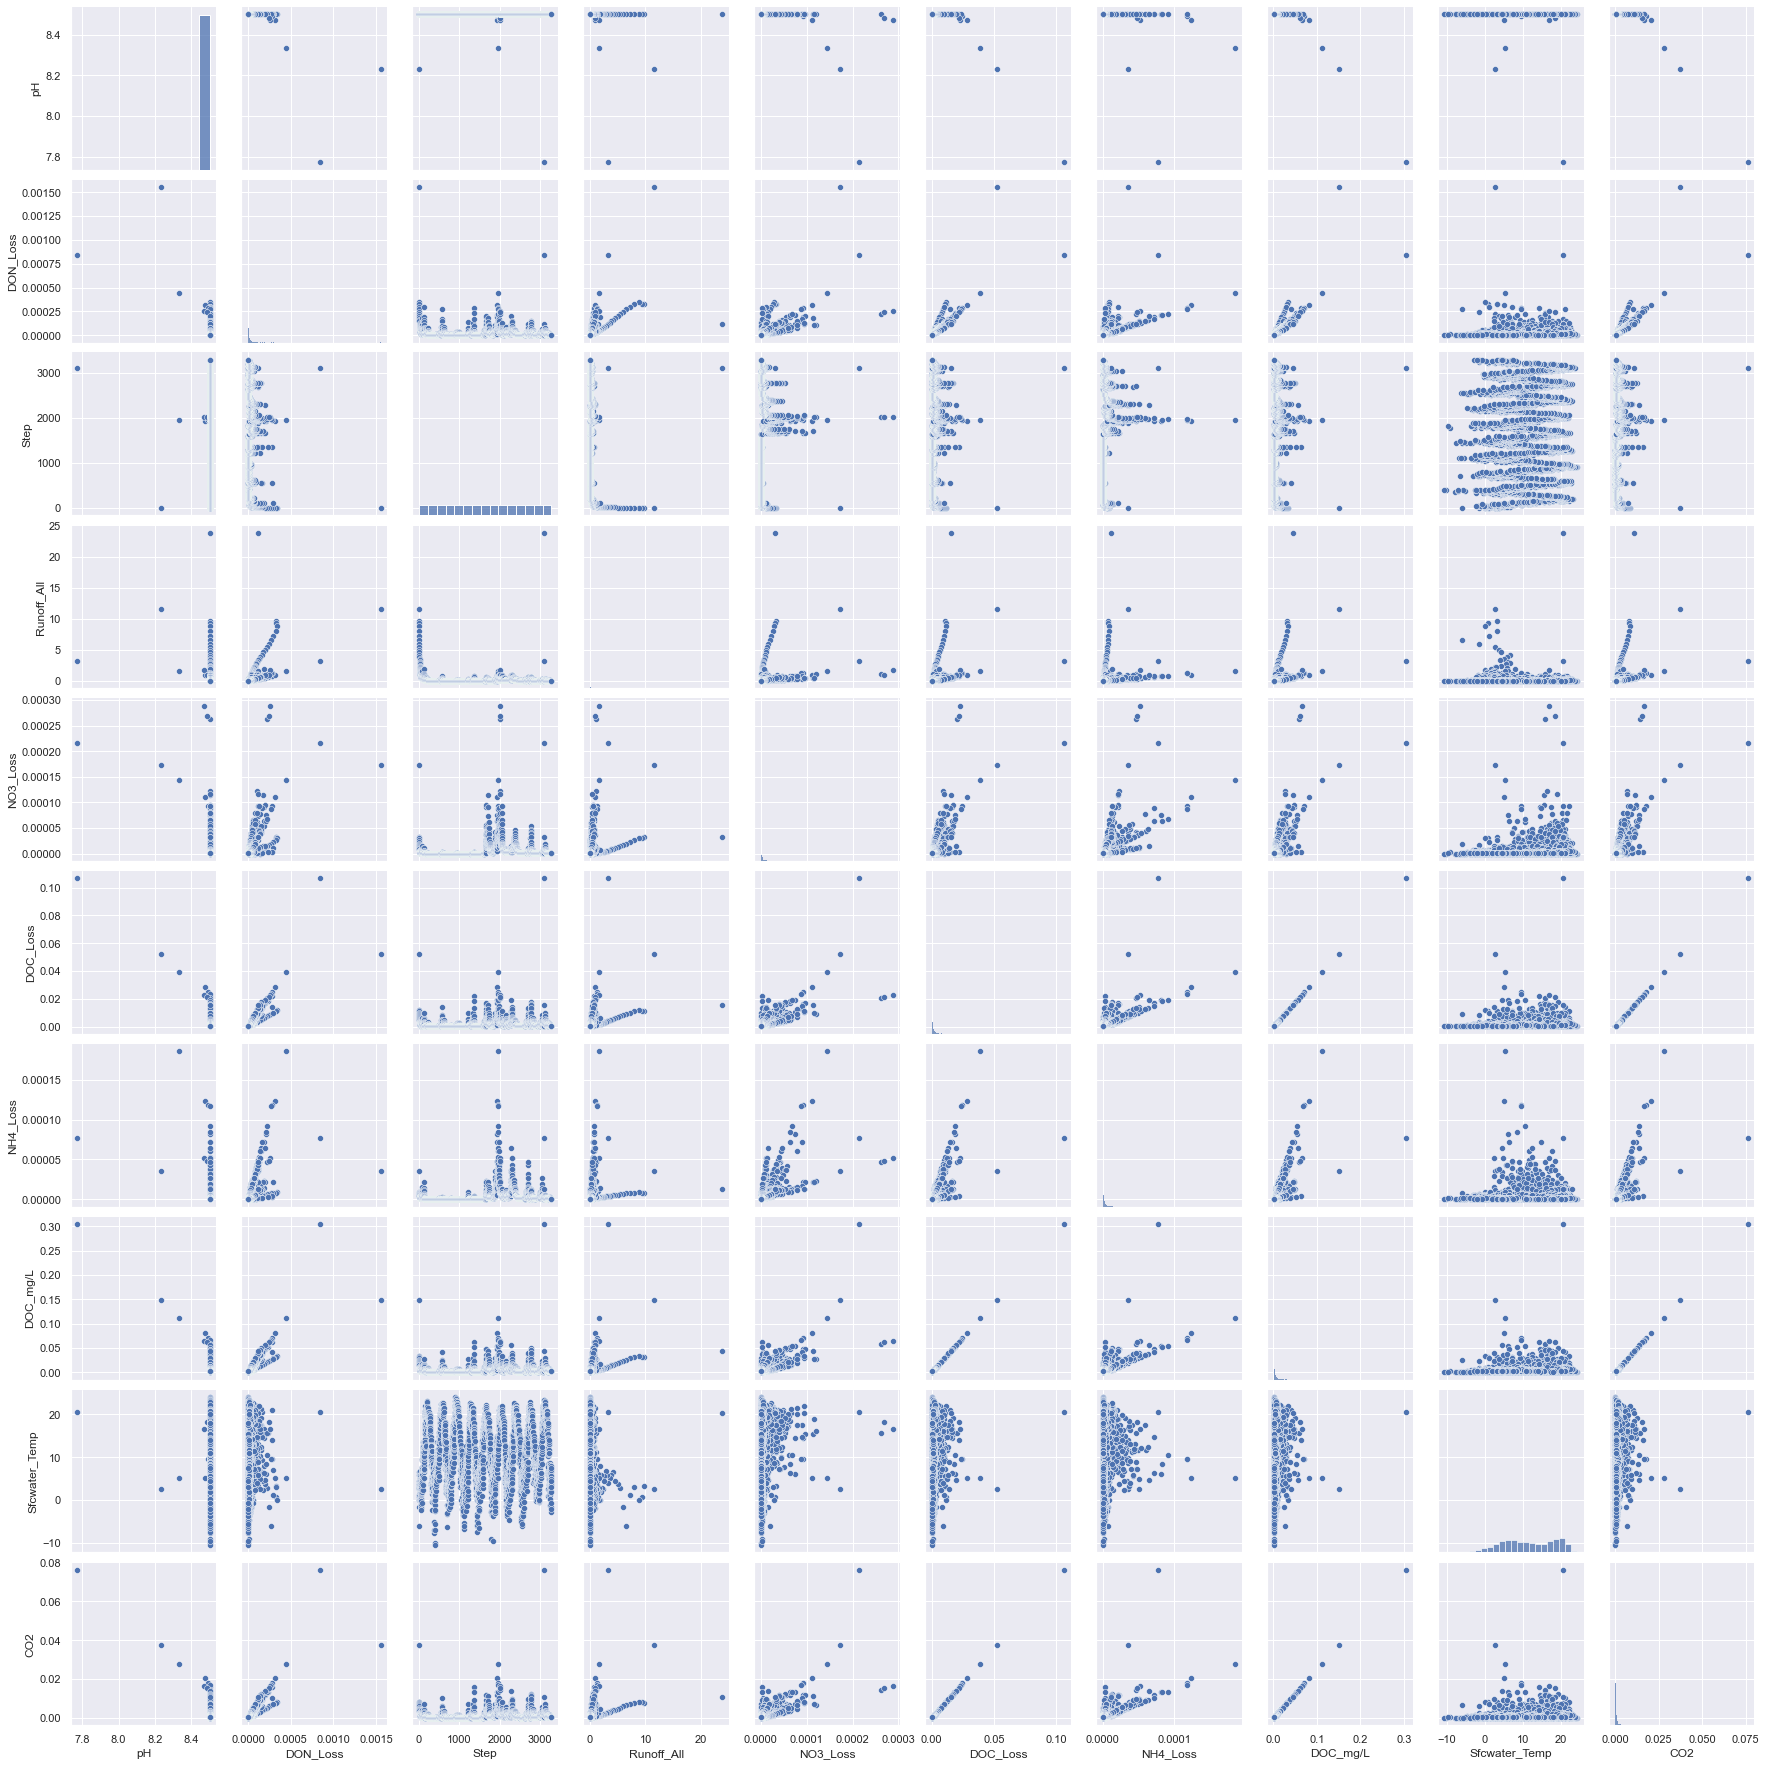

In [34]:
sns.pairplot(data_2.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

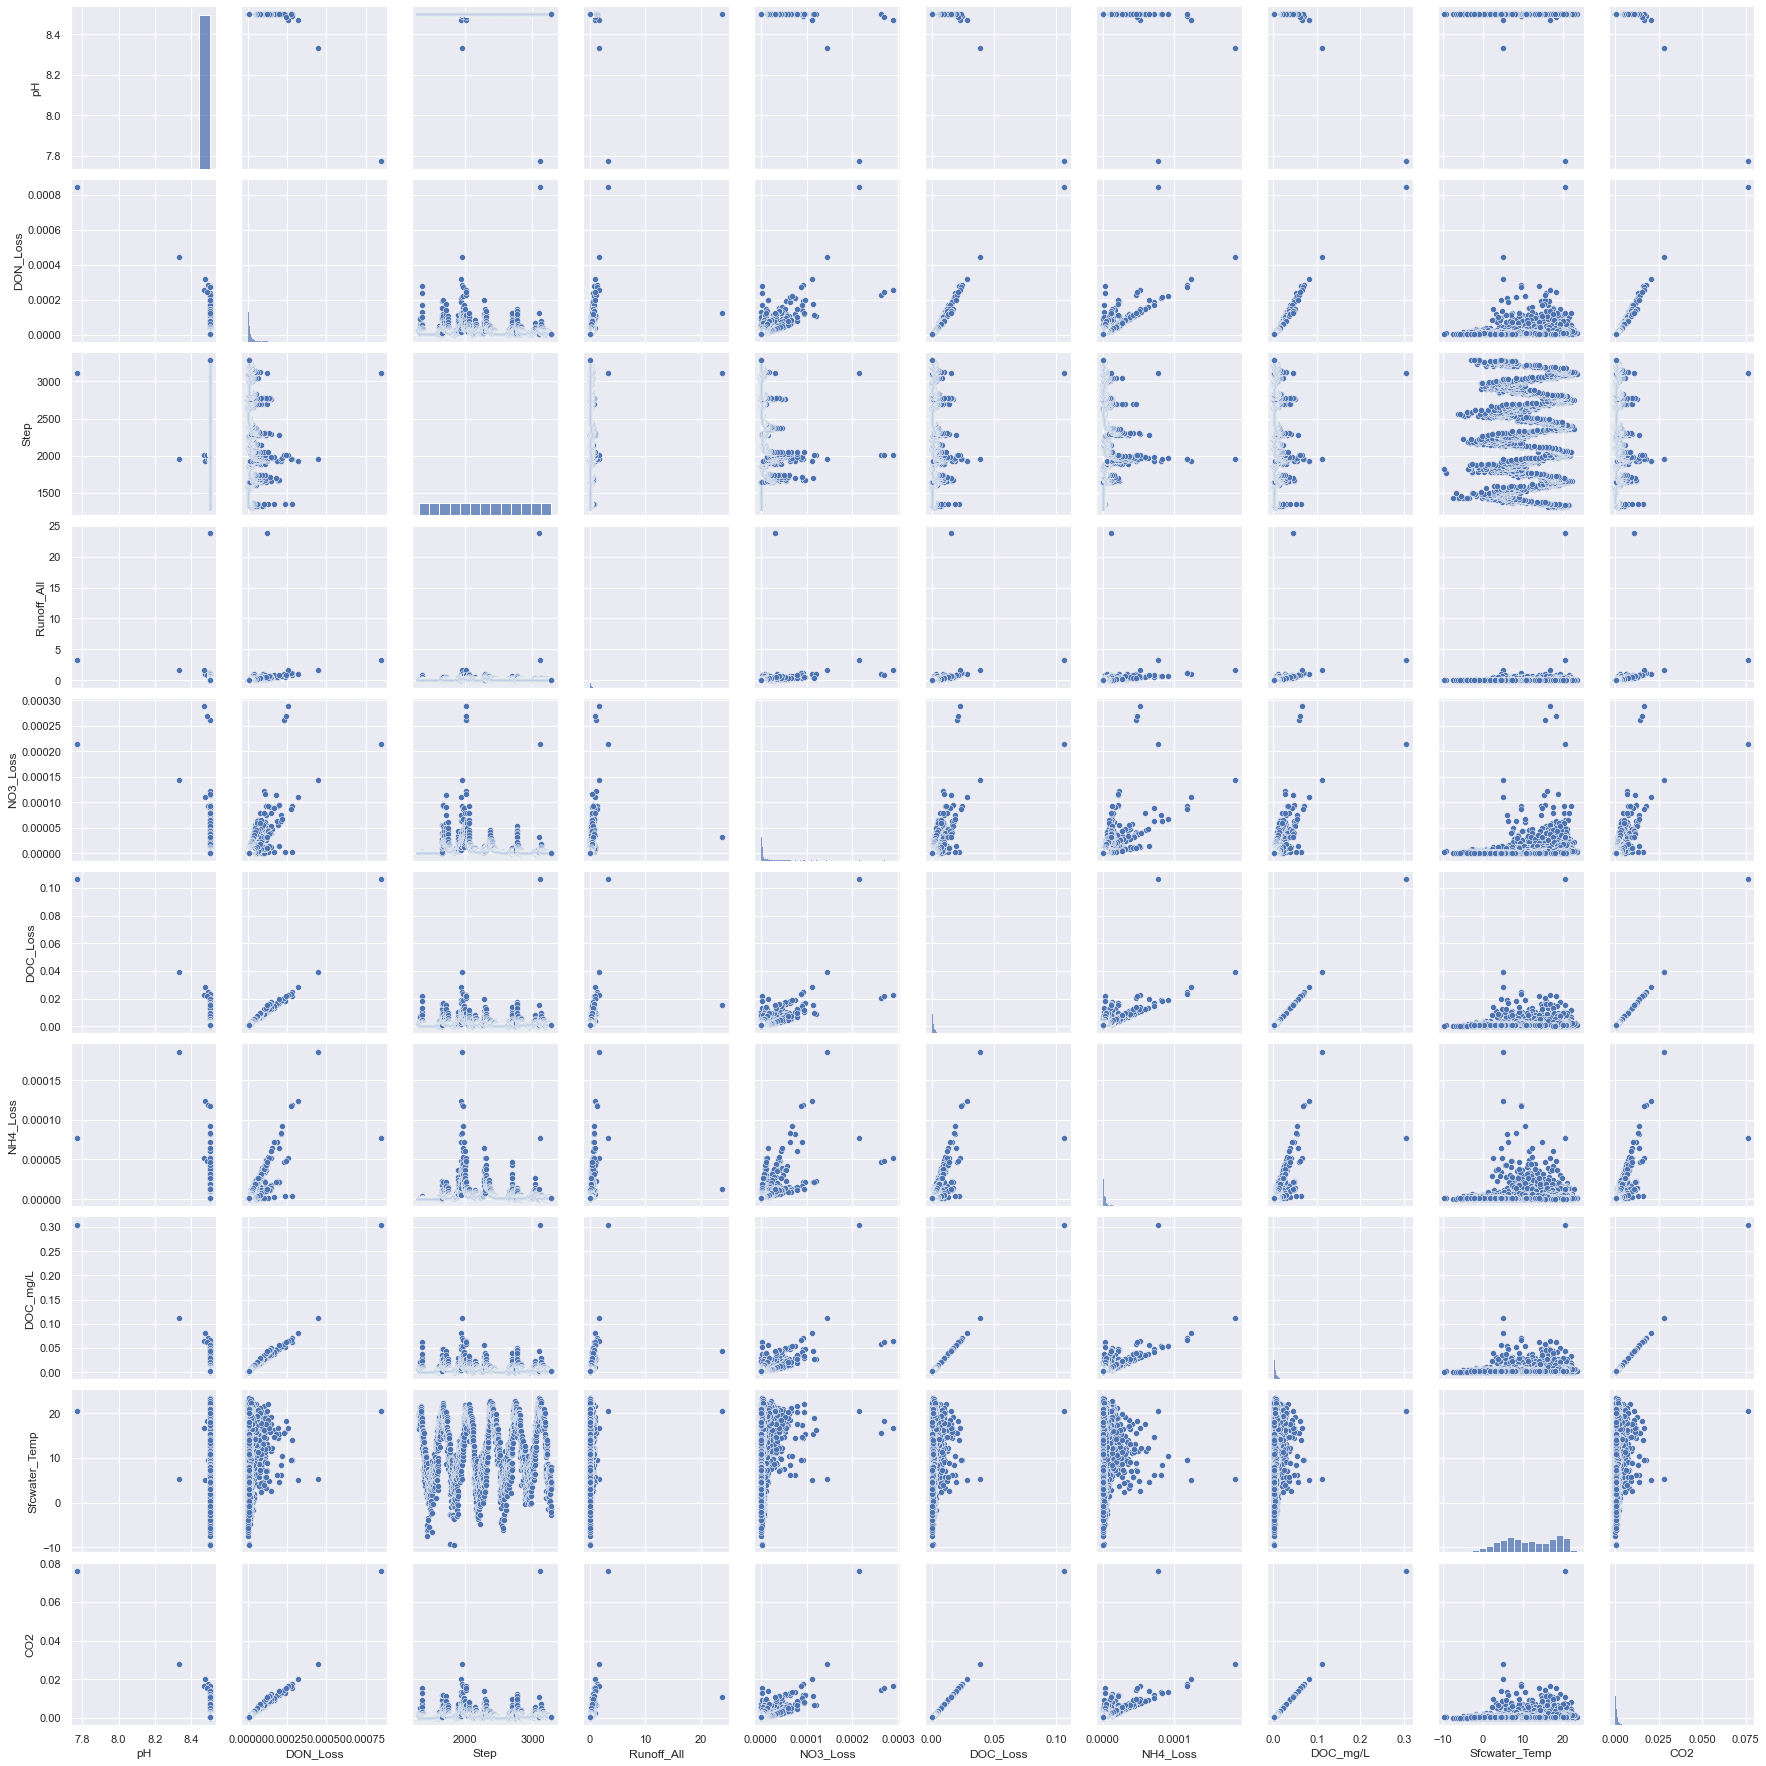

In [35]:
sns.pairplot(df_di_a.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True);
plt.show()

In [36]:
import numpy as np

In [37]:
perc = [.10, .25, .5, .75, .90]; print(type(perc));

<class 'list'>


In [38]:
data_2.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  3287.000000                            3.287000e+03   
mean      8.499622                            1.878475e-05   
std       0.013838                            4.489961e-05   
min       7.773058                            4.437404e-07   
10%       8.500000                            1.254987e-06   
25%       8.500000                            2.640910e-06   
50%       8.500000                            7.607403e-06   
75%       8.500000                            1.906762e-05   
90%       8.500000                            4.212358e-05   
max       8.500000                            1.554523e-03   

       Runoff_All(mm/day)_Delineated_Average  \
count                            3287.000000   
mean                                0.133986   
std                                 0.655423   
min                                 0.002260   
10%                                 0.003516   
25%                                 0.009623   
50%                                 0.026658   
75%                                 0.087338   
90%                                 0.271871   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.287000e+03   
mean                             4.978473e-06   
std                              1.456515e-05   
min                              6.078583e-10   
10%                              2.022183e-08   
25%                              5.444385e-08   
50%                              8.069959e-07   
75%                              3.515388e-06   
90%                              1.343456e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             3287.000000   
mean                                 0.001490   
std                                  0.003241   
min                                  0.000029   
10%                                  0.000075   
25%                                  0.000190   
50%                                  0.000657   
75%                                  0.001598   
90%                                  0.003388   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.287000e+03  3287.000000       3287.000000   
mean                             3.438010e-06     0.004256         11.248536   
std                              8.623039e-06     0.009260          6.931090   
min                              6.251167e-08     0.000084        -10.562500   
10%                              9.847553e-08     0.000214          2.262500   
25%                              1.837195e-07     0.000544          5.787500   
50%                              1.115351e-06     0.001877         11.112499   
75%                              3.157336e-06     0.004565         17.712502   
90%                              7.744255e-06     0.009679         20.412498   
max                              1.857148e-04     0.304801         24.087502   

               CO2  
count  3287.000000  
mean      0.001064  
std       0.002315  
min       0.000021  
10%       0.000054  
25%       0.000136  
50%       0.000469  
75%       0.001141  
90%       0.002420  
max       0.076200

In [39]:
df_di_a.drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000                            1.978000e+03   
mean      8.499508                            2.164288e-05   
std       0.016792                            3.745176e-05   
min       7.773058                            9.759353e-07   
10%       8.500000                            2.553943e-06   
25%       8.500000                            5.191316e-06   
50%       8.500000                            1.061310e-05   
75%       8.500000                            2.340793e-05   
90%       8.500000                            4.908391e-05   
max       8.500000                            8.446740e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1978.000000   
mean                                0.108443   
std                                 0.557444   
min                                 0.002260   
10%                                 0.005909   
25%                                 0.019538   
50%                                 0.042217   
75%                                 0.102724   
90%                                 0.254232   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             7.876538e-06   
std                              1.769875e-05   
min                              7.904378e-08   
10%                              8.898753e-08   
25%                              9.017865e-07   
50%                              2.540820e-06   
75%                              6.879975e-06   
90%                              2.084042e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             1978.000000   
mean                                 0.002072   
std                                  0.003771   
min                                  0.000075   
10%                                  0.000231   
25%                                  0.000537   
50%                                  0.001101   
75%                                  0.002235   
90%                                  0.004525   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.978000e+03  1978.000000       1978.000000   
mean                             5.276231e-06     0.005920         11.347358   
std                              1.062890e-05     0.010775          6.693310   
min                              8.243249e-08     0.000215         -9.512501   
10%                              2.330465e-07     0.000661          2.765000   
25%                              1.111031e-06     0.001533          6.162500   
50%                              2.214690e-06     0.003144         11.300000   
75%                              4.860416e-06     0.006385         17.562500   
90%                              1.251450e-05     0.012928         20.037498   
max                              1.857148e-04     0.304801         23.487500   

               CO2  
count  1978.000000  
mean      0.001480  
std       0.002694  
min       0.000054  
10%       0.000165  
25%       0.000383  
50%       0.000786  
75%       0.001596  
90%       0.003232  
max       0.076200

In [40]:
df_di_a.loc[df_di_a['Condition'] == 'Prefire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  313.0                            3.130000e+02   
mean     8.5                            1.067065e-05   
std      0.0                            2.678670e-05   
min      8.5                            9.759353e-07   
10%      8.5                            1.095212e-06   
25%      8.5                            1.272336e-06   
50%      8.5                            2.550547e-06   
75%      8.5                            8.832043e-06   
90%      8.5                            2.546706e-05   
max      8.5                            2.804584e-04   

       Runoff_All(mm/day)_Delineated_Average  \
count                             313.000000   
mean                                0.022621   
std                                 0.069063   
min                                 0.002260   
10%                                 0.002363   
25%                                 0.002523   
50%                                 0.004108   
75%                                 0.014628   
90%                                 0.049896   
max                                 0.794720   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            3.130000e+02   
mean                             1.711287e-07   
std                              2.815616e-07   
min                              7.904378e-08   
10%                              7.985036e-08   
25%                              8.054705e-08   
50%                              8.301116e-08   
75%                              1.400028e-07   
90%                              3.296859e-07   
max                              2.944867e-06   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                              313.000000   
mean                                 0.000837   
std                                  0.002102   
min                                  0.000075   
10%                                  0.000085   
25%                                  0.000099   
50%                                  0.000199   
75%                                  0.000711   
90%                                  0.002030   
max                                  0.022068   

       NH4_Loss(gN/day/m2)_Delineated_Average    DOC_mg/L  Sfc_Water_Temp_C  \
count                            3.130000e+02  313.000000        313.000000   
mean                             2.808620e-07    0.002390          9.384385   
std                              3.906141e-07    0.006006          6.408665   
min                              8.243249e-08    0.000215         -7.412499   
10%                              9.171854e-08    0.000242          2.187500   
25%                              1.186726e-07    0.000282          5.037500   
50%                              1.764803e-07    0.000569          8.112500   
75%                              2.885148e-07    0.002031         14.787500   
90%                              4.967247e-07    0.005799         18.687500   
max                              4.030530e-06    0.063052         21.612500   

              CO2  
count  313.000000  
mean     0.000598  
std      0.001501  
min      0.000054  
10%      0.000060  
25%      0.000071  
50%      0.000142  
75%      0.000508  
90%      0.001450  
max      0.015763

In [41]:
df_di_a.loc[df_di_a['Condition'] == 'Postfire'].drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140', 'Step'}).describe(percentiles=perc)

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.499415                                0.000024   
std       0.018302                                0.000039   
min       7.773058                                0.000002   
10%       8.500000                                0.000004   
25%       8.500000                                0.000006   
50%       8.500000                                0.000012   
75%       8.500000                                0.000025   
90%       8.500000                                0.000053   
max       8.500000                                0.000845   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.124576   
std                                 0.605520   
min                                 0.008005   
10%                                 0.017651   
25%                                 0.025408   
50%                                 0.053900   
75%                                 0.123497   
90%                                 0.278673   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             9.325062e-06   
std                              1.894426e-05   
min                              3.118361e-07   
10%                              8.590170e-07   
25%                              1.353519e-06   
50%                              3.232632e-06   
75%                              9.460433e-06   
90%                              2.411716e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.002304   
std                                  0.003966   
min                                  0.000180   
10%                                  0.000373   
25%                                  0.000692   
50%                                  0.001245   
75%                                  0.002474   
90%                                  0.004995   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.665000e+03  1665.000000       1665.000000   
mean                             6.215301e-06     0.006584         11.716374   
std                              1.134103e-05     0.011331          6.683227   
min                              4.983272e-07     0.000513         -9.512501   
10%                              1.067930e-06     0.001067          3.012500   
25%                              1.345409e-06     0.001976          6.462500   
50%                              2.762044e-06     0.003556         11.712500   
75%                              5.693684e-06     0.007069         18.012500   
90%                              1.405424e-05     0.014272         20.187500   
max                              1.857148e-04     0.304801         23.487500   

               CO2  
count  1665.000000  
mean      0.001646  
std       0.002833  
min       0.000128  
10%       0.000267  
25%       0.000494  
50%       0.000889  
75%       0.001767  
90%       0.003568  
max       0.076200

In [42]:
df_pools_dif = pools_di.drop(columns={'Unnamed: 0', 'Sfc_Water_Temp_C', 'Criteria', 'Condition'})

In [43]:
df_di_a.describe()

pH_1T   Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.499508  2297.500000                            2.164288e-05   
std       0.016792   571.143736                            3.745176e-05   
min       7.773058  1309.000000                            9.759353e-07   
25%       8.500000  1803.250000                            5.191316e-06   
50%       8.500000  2297.500000                            1.061310e-05   
75%       8.500000  2791.750000                            2.340793e-05   
max       8.500000  3286.000000                            8.446740e-04   

              Step  Runoff_All(mm/day)_Delineated_Average  \
count  1978.000000                            1978.000000   
mean   2297.500000                               0.108443   
std     571.143736                               0.557444   
min    1309.000000                               0.002260   
25%    1803.250000                               0.019538   
50%    2297.500000                               0.042217   
75%    2791.750000                               0.102724   
max    3286.000000                              23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             7.876538e-06   
std                              1.769875e-05   
min                              7.904378e-08   
25%                              9.017865e-07   
50%                              2.540820e-06   
75%                              6.879975e-06   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             1978.000000   
mean                                 0.002072   
std                                  0.003771   
min                                  0.000075   
25%                                  0.000537   
50%                                  0.001101   
75%                                  0.002235   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average         Year     DOC_mg/L  \
count                            1.978000e+03  1978.000000  1978.000000   
mean                             5.276231e-06  2003.769464     0.005920   
std                              1.062890e-05     1.576393     0.010775   
min                              8.243249e-08  2001.000000     0.000215   
25%                              1.111031e-06  2002.000000     0.001533   
50%                              2.214690e-06  2004.000000     0.003144   
75%                              4.860416e-06  2005.000000     0.006385   
max                              1.857148e-04  2006.000000     0.304801   

       Sfc_Water_Temp_C          CO2  Alk_140  
count       1978.000000  1978.000000   1978.0  
mean          11.347358     0.001480    140.0  
std            6.693310     0.002694      0.0  
min           -9.512501     0.000054    140.0  
25%            6.162500     0.000383    140.0  
50%           11.300000     0.000786    140.0  
75%           17.562500     0.001596    140.0  
max           23.487500     0.076200    140.0

In [44]:
df_di_a_lr = df_di_a.drop(columns={'Unnamed: 0', 'Criteria', 'Condition'}).apply(lambda x:stats.linregress(df_di_a.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})



In [45]:
df_di_a_lr

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
slope     -7.860605e-07                           -6.847573e-09   1.0   
intercept  8.501314e+00                            3.737517e-05   0.0   
rvalue    -2.673537e-02                           -1.044263e-01   1.0   
p-value    2.346330e-01                            3.253627e-06   0.0   
stderr     6.611820e-07                            1.467075e-09   0.0   

           Runoff_All(mm/day)_Delineated_Average  \
slope                                   0.000023   
intercept                               0.056110   
rvalue                                  0.023338   
p-value                                 0.299532   
stderr                                  0.000022   

           NO3_Loss(gN/day/m2)_Delineated_Average  \
slope                               -4.058542e-09   
intercept                            1.720104e-05   
rvalue                              -1.309703e-01   
p-value                              5.023705e-09   
stderr                               6.911090e-10   

           DOC_Loss(gC/day/m2)_Delineated_Average  \
slope                               -1.967921e-07   
intercept                            2.524259e-03   
rvalue                              -2.980354e-02   
p-value                              1.851843e-01   
stderr                               1.484750e-07   

           NH4_Loss(gN/day/m2)_Delineated_Average         Year      DOC_mg/L  \
slope                               -1.078644e-09     0.002713 -5.622630e-07   
intercept                            7.754415e-06  1997.536209  7.212168e-03   
rvalue                              -5.796093e-02     0.982970 -2.980354e-02   
p-value                              9.927805e-03     0.000000  1.851843e-01   
stderr                               4.179444e-10     0.000011  4.242142e-07   

           Sfc_Water_Temp_C           CO2  Alk_140  
slope              0.000758 -1.405658e-07      0.0  
intercept          9.606002  1.803042e-03    140.0  
rvalue             0.064675 -2.980354e-02      0.0  
p-value            0.004007  1.851843e-01      1.0  
stderr             0.000263  1.060535e-07      0.0

In [46]:
df_pools_dif.head()

DON_Pool(gN/m2)_Delineated_Average  DOC_Pool(gC/m2)_Delineated_Average  \
0                            4.924302                          179.252505   
1                            4.925278                          179.411087   
2                            4.926281                          179.572787   
3                            4.927280                          179.732742   
4                            4.928266                          179.886060   

   NH4_Pool(gN/m2)_Delineated_Average  NO3_Pool(gN/m2)_Delineated_Average  \
0                            0.620363                            0.151209   
1                            0.624142                            0.152440   
2                            0.619994                            0.153252   
3                            0.616766                            0.153724   
4                            0.615890                            0.154073   

   Step  Runoff_All(mm/day)_Delineated_Average  
0  1309                               0.033262  
1  1310                               0.049177  
2  1311                               0.059757  
3  1312                               0.043195  
4  1313                               0.033943

In [47]:
df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values; 
df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
df_di_a['NO3_Pool'] = df_pools_dif['NO3_Pool(gN/m2)_Delineated_Average'].values;
datetime_series = pd.date_range('1998-01-01', periods=3287, freq='D'); #When no date file is executed from DOC Check
datetime_series[1309:3288];
df_di_a['Date'] = datetime_series[1309:3288].values;

<ipython-input-47-e3b78498b3f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['DOC_Pool'] = df_pools_dif['DOC_Pool(gC/m2)_Delineated_Average'].values;
<ipython-input-47-e3b78498b3f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['NH4_Pool'] = df_pools_dif['NH4_Pool(gN/m2)_Delineated_Average'].values;
<ipython-input-47-e3b78498b3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [48]:
df_di_a['Criteria'] = str('Meets')

<ipython-input-48-63546f0ec94d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_di_a['Criteria'] = str('Meets')


In [49]:
df_di_a.describe(percentiles=perc)

pH_1T   Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1978.000000  1978.000000                            1.978000e+03   
mean      8.499508  2297.500000                            2.164288e-05   
std       0.016792   571.143736                            3.745176e-05   
min       7.773058  1309.000000                            9.759353e-07   
10%       8.500000  1506.700000                            2.553943e-06   
25%       8.500000  1803.250000                            5.191316e-06   
50%       8.500000  2297.500000                            1.061310e-05   
75%       8.500000  2791.750000                            2.340793e-05   
90%       8.500000  3088.300000                            4.908391e-05   
max       8.500000  3286.000000                            8.446740e-04   

              Step  Runoff_All(mm/day)_Delineated_Average  \
count  1978.000000                            1978.000000   
mean   2297.500000                               0.108443   
std     571.143736                               0.557444   
min    1309.000000                               0.002260   
10%    1506.700000                               0.005909   
25%    1803.250000                               0.019538   
50%    2297.500000                               0.042217   
75%    2791.750000                               0.102724   
90%    3088.300000                               0.254232   
max    3286.000000                              23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.978000e+03   
mean                             7.876538e-06   
std                              1.769875e-05   
min                              7.904378e-08   
10%                              8.898753e-08   
25%                              9.017865e-07   
50%                              2.540820e-06   
75%                              6.879975e-06   
90%                              2.084042e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             1978.000000   
mean                                 0.002072   
std                                  0.003771   
min                                  0.000075   
10%                                  0.000231   
25%                                  0.000537   
50%                                  0.001101   
75%                                  0.002235   
90%                                  0.004525   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average         Year     DOC_mg/L  \
count                            1.978000e+03  1978.000000  1978.000000   
mean                             5.276231e-06  2003.769464     0.005920   
std                              1.062890e-05     1.576393     0.010775   
min                              8.243249e-08  2001.000000     0.000215   
10%                              2.330465e-07  2002.000000     0.000661   
25%                              1.111031e-06  2002.000000     0.001533   
50%                              2.214690e-06  2004.000000     0.003144   
75%                              4.860416e-06  2005.000000     0.006385   
90%                              1.251450e-05  2006.000000     0.012928   
max                              1.857148e-04  2006.000000     0.304801   

       Sfc_Water_Temp_C          CO2  Alk_140     DOC_Pool     NH4_Pool  \
count       1978.000000  1978.000000   1978.0  1978.000000  1978.000000   
mean          11.347358     0.001480    140.0   272.670720     2.649686   
std            6.693310     0.002694      0.0    57.386252     1.085076   
min           -9.512501     0.000054    140.0   179.252505     0.595338   
10%            2.765000     0.000165    140.0   190.945971     1.021912   
25%            6.162500     0.000383    140.0   224.120941     2.008563   
50%           11.300000     0.000786    140.0   269.274663     2.545964   
75%      

In [50]:
df_di_a.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309    8.5        1309                                0.000018  1309   
1310    8.5        1310                                0.000024  1310   
1311    8.5        1311                                0.000031  1311   
1312    8.5        1312                                0.000023  1312   
1313    8.5        1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  \
1309                                0.001378   
1310                                0.001842   
1311                                0.002379   
1312                                0.001802   
1313                                0.001439   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  \
1309                            2.683968e-07  2001  0.003938   
1310                            3.533067e-07  2001  0.005262   
1311                            4.222335e-07  2001  0.006797   
1312                            3.216508e-07  2001  0.005148   
1313                            2.650055e-07  2001  0.004112   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1309         20.112500  0.000984      140   Prefire    Meets  179.252505   
1310         19.737500  0.001315      140   Prefire    Meets  179.411087   
1311         19.962502  0.001699      140   Prefire    Meets  179.572787   
1312         19.812500  0.001287      140   Prefire    Meets  179.732742   
1313         19.287498  0.001028      140   Prefire    Meets  179.886060   

      NH4_Pool  NO3_Pool       Date  
1309  0.620363  0.151209 2001-08-02  
1310  0.624142  0.152440 2001-08-03  
1311  0.619994  0.153252 2001-08-04  
1312  0.616766  0.153724 2001-08-05  
1313  0.615890  0.154073 2001-08-06

In [51]:
#Defining all as Meets so that the .loc of the criteria mask will set the criteria to exceeds
df_di_a['Criteria'].unique()

array(['Meets'], dtype=object)

In [52]:
#Setting EPA Criteria Mask for those days where exceedance occured for NH4 or NO3 based on pH calculation
criteria_mask = df_di_a[((df_di_a['NH4_Pool'] > 0.569) & (df_di_a['pH_1T'] == 8.5) | ((df_di_a['NH4_Pool'] >  1.27) & (df_di_a['pH_1T'] == 8.0)) | (df_di_a['NO3_Pool'] > 1.59))];

In [53]:
#Those that 'exceed' drink water standards
criteria_mask
#export criteria mask to csv
#criteria_mask.to_csv('11192120APR21B_WQX_Exceedance.csv')

In [54]:
df_di_a['Criteria'].loc[criteria_mask.index] = str('Exceeds')

C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\kvenable\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [55]:
df_di_a['Criteria'].unique()

array(['Exceeds', 'Meets'], dtype=object)

In [56]:
criteria_mask.drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC20APR21b_exceed_allstats.csv')

In [57]:
criteria_mask.loc[criteria_mask['Condition'] == 'Prefire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Step', 'Unnamed: 0', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC20APR21b_exceed_pfstats.csv')

In [58]:
criteria_mask.loc[criteria_mask['Condition'] == 'Postfire'].drop(columns={'CO2', 'Alk_140', 'Condition', 'Criteria', 'Unnamed: 0', 'Step', 'Year'}).describe(percentiles=perc)#.to_csv('111921BC20APR21b_exceed_pofstats.csv')

In [59]:
bc_pf = df_di_a.loc[df_di_a['Condition'] == 'Prefire']; bc_pf.head()

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1309    8.5        1309                                0.000018  1309   
1310    8.5        1310                                0.000024  1310   
1311    8.5        1311                                0.000031  1311   
1312    8.5        1312                                0.000023  1312   
1313    8.5        1313                                0.000019  1313   

      Runoff_All(mm/day)_Delineated_Average  \
1309                               0.033262   
1310                               0.049177   
1311                               0.059757   
1312                               0.043195   
1313                               0.033943   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1309                            2.677347e-07   
1310                            3.472315e-07   
1311                            4.345409e-07   
1312                            3.428635e-07   
1313                            2.838032e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  \
1309                                0.001378   
1310                                0.001842   
1311                                0.002379   
1312                                0.001802   
1313                                0.001439   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  \
1309                            2.683968e-07  2001  0.003938   
1310                            3.533067e-07  2001  0.005262   
1311                            4.222335e-07  2001  0.006797   
1312                            3.216508e-07  2001  0.005148   
1313                            2.650055e-07  2001  0.004112   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1309         20.112500  0.000984      140   Prefire  Exceeds  179.252505   
1310         19.737500  0.001315      140   Prefire  Exceeds  179.411087   
1311         19.962502  0.001699      140   Prefire  Exceeds  179.572787   
1312         19.812500  0.001287      140   Prefire  Exceeds  179.732742   
1313         19.287498  0.001028      140   Prefire  Exceeds  179.886060   

      NH4_Pool  NO3_Pool       Date  
1309  0.620363  0.151209 2001-08-02  
1310  0.624142  0.152440 2001-08-03  
1311  0.619994  0.153252 2001-08-04  
1312  0.616766  0.153724 2001-08-05  
1313  0.615890  0.154073 2001-08-06

In [60]:
bc_pf_lr = bc_pf.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pf.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [61]:
#Brush Creek Pre-fire linear #.to_csv('111921BC20APR21b_pflr.csv')regression
bc_pf_lr;
#bc_pf_lr.to_csv('111921BC20APR21b_pflr.csv')

In [62]:
bc_pof = df_di_a.loc[df_di_a['Condition'] == 'Postfire'] 
bc_pof.head()
#bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0'})

pH_1T  Unnamed: 0  DON_Loss(gN/day/m2)_Delineated_Average  Step  \
1622    8.5        1622                                0.000021  1622   
1623    8.5        1623                                0.000021  1623   
1624    8.5        1624                                0.000021  1624   
1625    8.5        1625                                0.000018  1625   
1626    8.5        1626                                0.000017  1626   

      Runoff_All(mm/day)_Delineated_Average  \
1622                               0.038800   
1623                               0.039755   
1624                               0.038900   
1625                               0.033364   
1626                               0.029498   

      NO3_Loss(gN/day/m2)_Delineated_Average  \
1622                            3.118361e-07   
1623                            3.477741e-07   
1624                            3.972694e-07   
1625                            3.991438e-07   
1626                            4.080771e-07   

      DOC_Loss(gC/day/m2)_Delineated_Average  \
1622                                0.001699   
1623                                0.001693   
1624                                0.001721   
1625                                0.001494   
1626                                0.001351   

      NH4_Loss(gN/day/m2)_Delineated_Average  Year  DOC_mg/L  \
1622                            6.023652e-07  2002  0.004855   
1623                            6.971061e-07  2002  0.004836   
1624                            7.931274e-07  2002  0.004916   
1625                            7.697723e-07  2002  0.004268   
1626                            7.642014e-07  2002  0.003861   

      Sfc_Water_Temp_C       CO2  Alk_140 Condition Criteria    DOC_Pool  \
1622         17.262500  0.001214      140  Postfire  Exceeds  196.492244   
1623         15.687500  0.001209      140  Postfire  Exceeds  196.643219   
1624         18.387500  0.001229      140  Postfire  Exceeds  196.838314   
1625         16.662500  0.001067      140  Postfire  Exceeds  197.004525   
1626         15.012501  0.000965      140  Postfire  Exceeds  197.146759   

      NH4_Pool  NO3_Pool       Date  
1622  0.802096  0.222317 2002-06-11  
1623  0.839261  0.225187 2002-06-12  
1624  0.872091  0.228565 2002-06-13  
1625  0.905180  0.232241 2002-06-14  
1626  0.936386  0.235890 2002-06-15

In [63]:
bc_pof.describe(percentiles=perc).drop(columns={'Unnamed: 0', 'Year', 'Step'})

pH_1T  DON_Loss(gN/day/m2)_Delineated_Average  \
count  1665.000000                             1665.000000   
mean      8.499415                                0.000024   
std       0.018302                                0.000039   
min       7.773058                                0.000002   
10%       8.500000                                0.000004   
25%       8.500000                                0.000006   
50%       8.500000                                0.000012   
75%       8.500000                                0.000025   
90%       8.500000                                0.000053   
max       8.500000                                0.000845   

       Runoff_All(mm/day)_Delineated_Average  \
count                            1665.000000   
mean                                0.124576   
std                                 0.605520   
min                                 0.008005   
10%                                 0.017651   
25%                                 0.025408   
50%                                 0.053900   
75%                                 0.123497   
90%                                 0.278673   
max                                23.830112   

       NO3_Loss(gN/day/m2)_Delineated_Average  \
count                            1.665000e+03   
mean                             9.325062e-06   
std                              1.894426e-05   
min                              3.118361e-07   
10%                              8.590170e-07   
25%                              1.353519e-06   
50%                              3.232632e-06   
75%                              9.460433e-06   
90%                              2.411716e-05   
max                              2.889207e-04   

       DOC_Loss(gC/day/m2)_Delineated_Average  \
count                             1665.000000   
mean                                 0.002304   
std                                  0.003966   
min                                  0.000180   
10%                                  0.000373   
25%                                  0.000692   
50%                                  0.001245   
75%                                  0.002474   
90%                                  0.004995   
max                                  0.106680   

       NH4_Loss(gN/day/m2)_Delineated_Average     DOC_mg/L  Sfc_Water_Temp_C  \
count                            1.665000e+03  1665.000000       1665.000000   
mean                             6.215301e-06     0.006584         11.716374   
std                              1.134103e-05     0.011331          6.683227   
min                              4.983272e-07     0.000513         -9.512501   
10%                              1.067930e-06     0.001067          3.012500   
25%                              1.345409e-06     0.001976          6.462500   
50%                              2.762044e-06     0.003556         11.712500   
75%                              5.693684e-06     0.007069         18.012500   
90%                              1.405424e-05     0.014272         20.187500   
max                              1.857148e-04     0.304801         23.487500   

               CO2  Alk_140     DOC_Pool     NH4_Pool     NO3_Pool  
count  1665.000000   1665.0  1665.000000  1665.000000  1665.000000  
mean      0.001646    140.0   288.262702     2.969129     1.207985  
std       0.002833      0.0    48.713060     0.861293     0.416778  
min       0.000128    140.0   196.492244     0.802096     0.222317  
10%       0.000267    140.0   223.472151     1.973690     0.715045  
25%       0.000494    140.0   246.927621     2.286441     0.904806  
50%       0.000889    140.0   294.822584     2.778357     1.116860  
75%       0.001767    140.0   333.400617     3.667658     1.433912  
90%       0.003568    140.0   353.806466     4.239859     1.934774  
max       0.076200    140.0   371.325596     4.772037     2.050827

In [64]:
bc_pof_lr = bc_pof.drop(columns={'Unnamed: 0', 'Criteria', 'Condition', 'Date'}).apply(lambda x:stats.linregress(bc_pof.index, x), result_type='expand').rename(index={0: 'slope', 1: 'intercept', 2: 'rvalue', 3:'p-value', 4:'stderr'})

In [65]:
bc_pof_lr;
#bc_pof_lr.to_csv('111921BC20APR21b_poflr.csv')

In [66]:
 #Oneway ANOVA between pre and post fire nitrates
stats.f_oneway(bc_pf['NO3_Pool'], bc_pof['NO3_Pool'])

F_onewayResult(statistic=1888.9149258934995, pvalue=3.5683180076482455e-290)

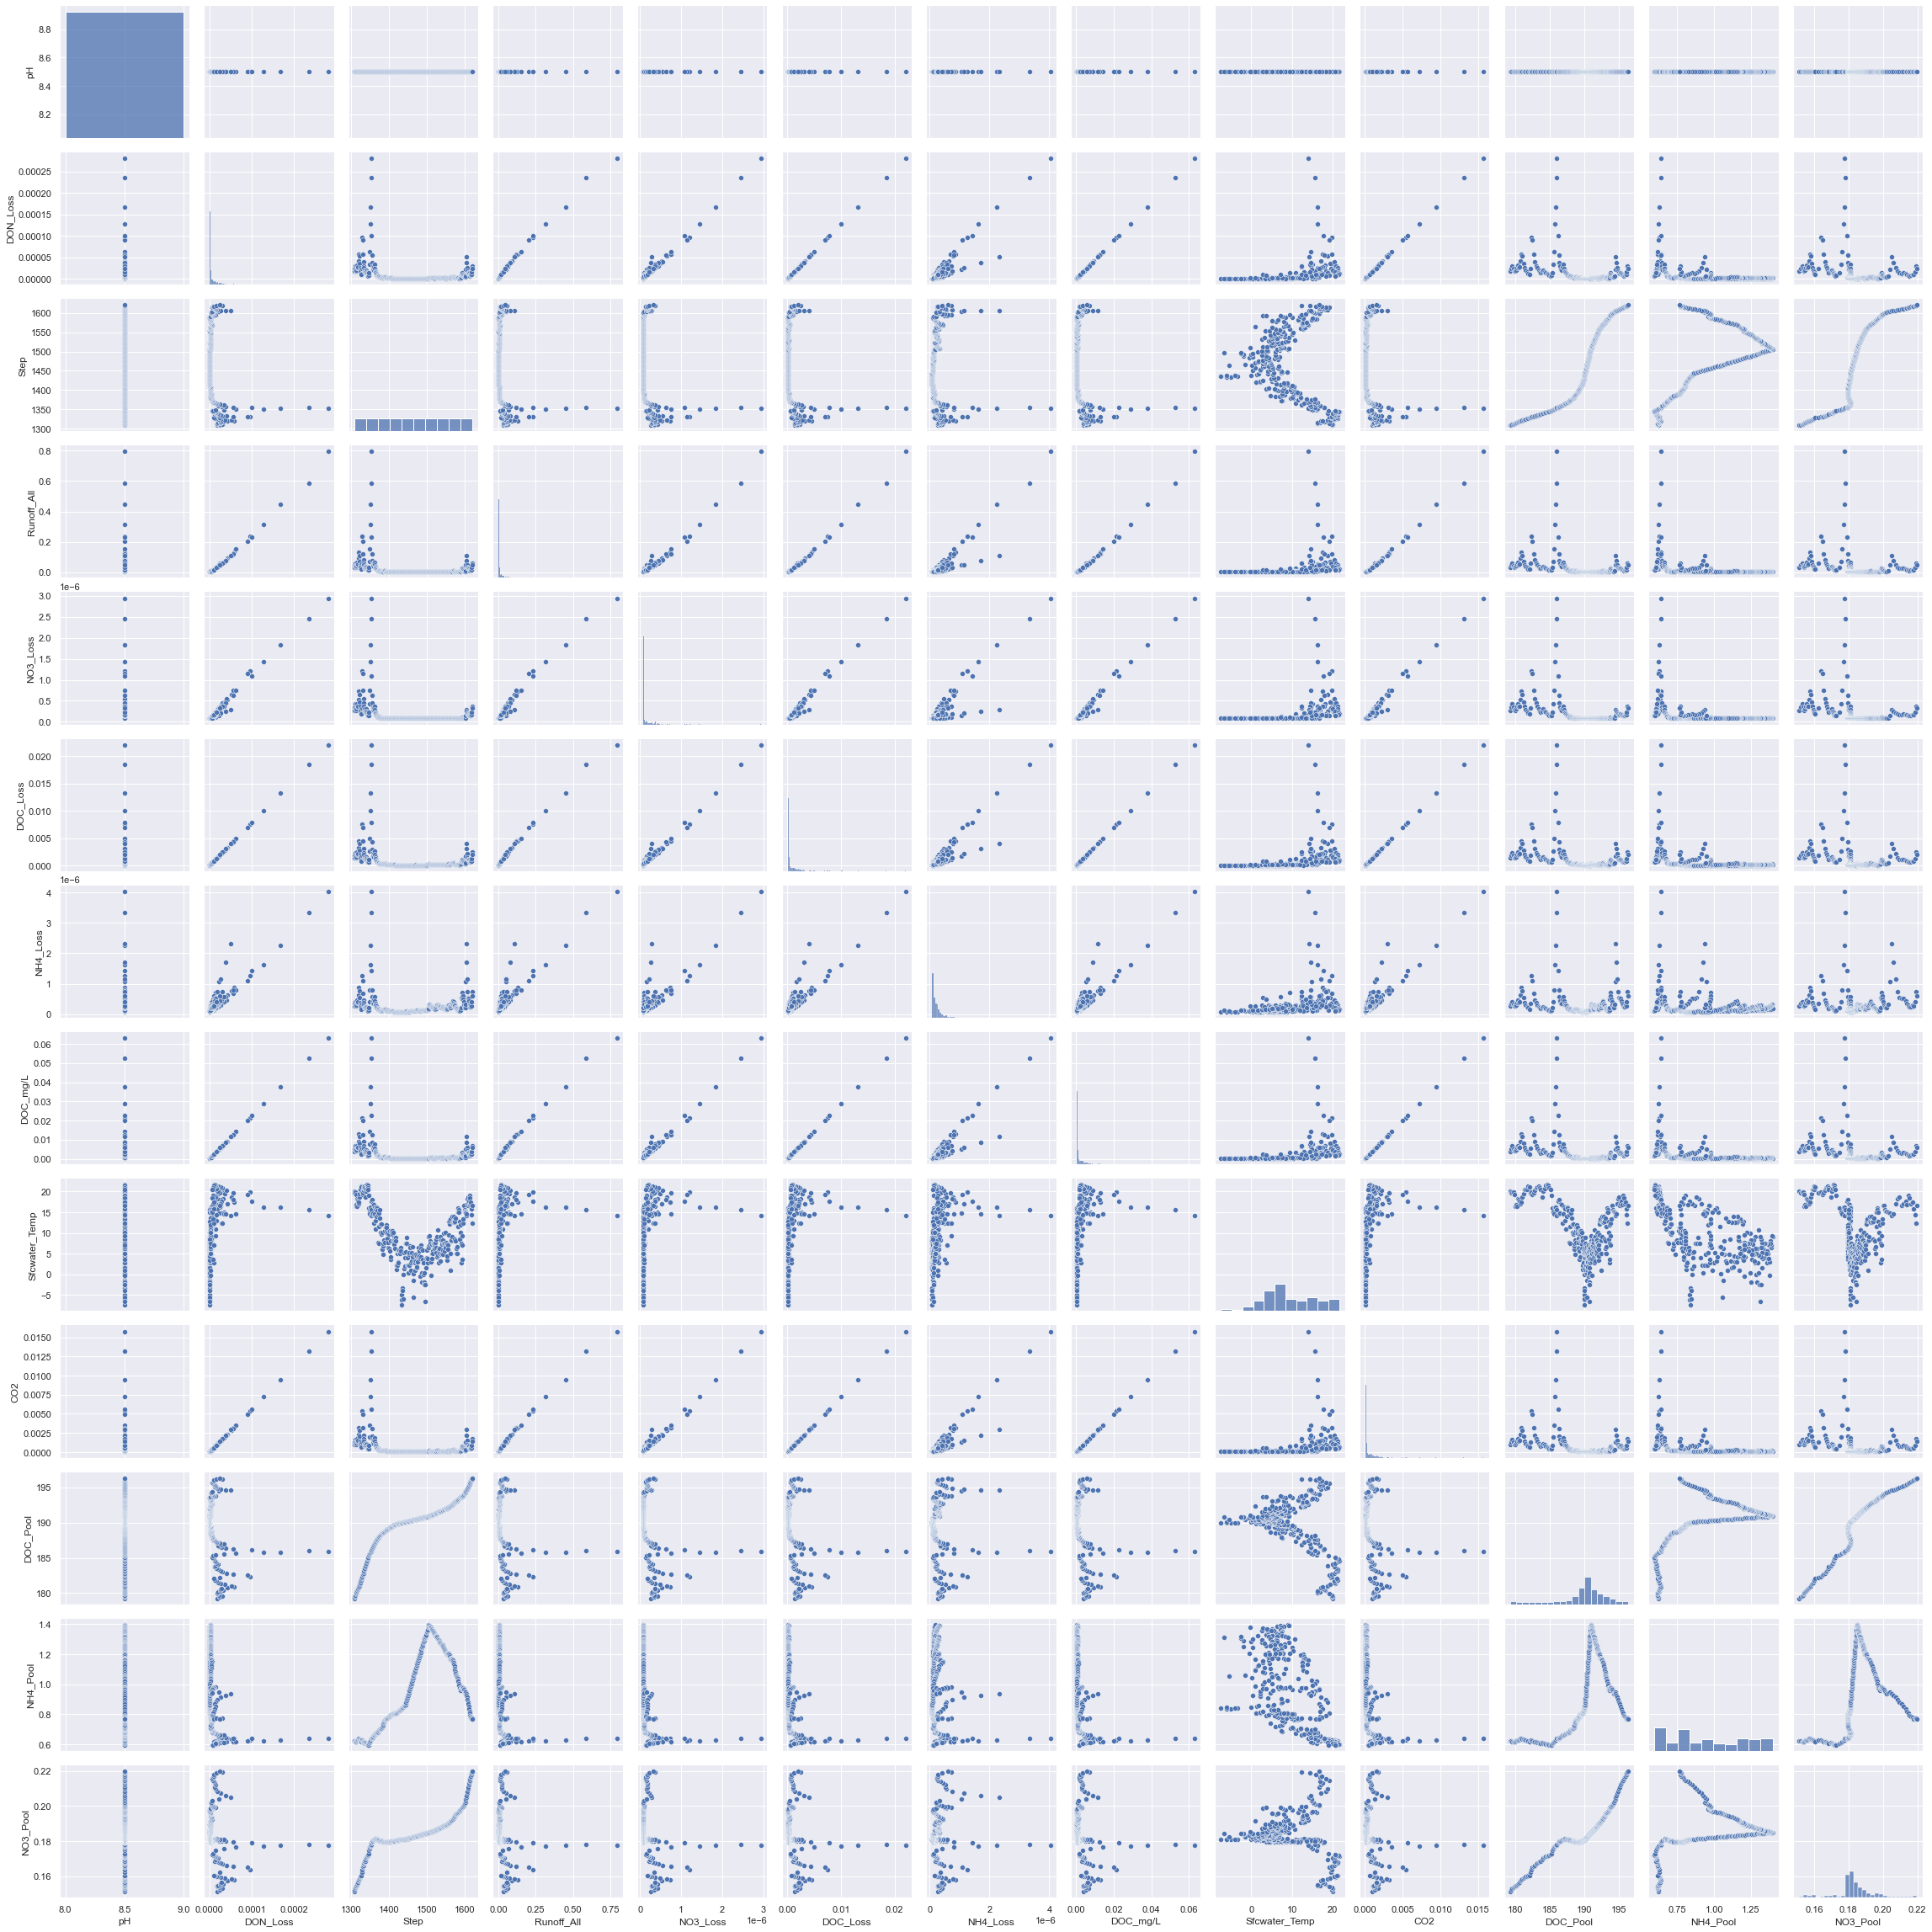

In [67]:
sns.pairplot(bc_pf.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

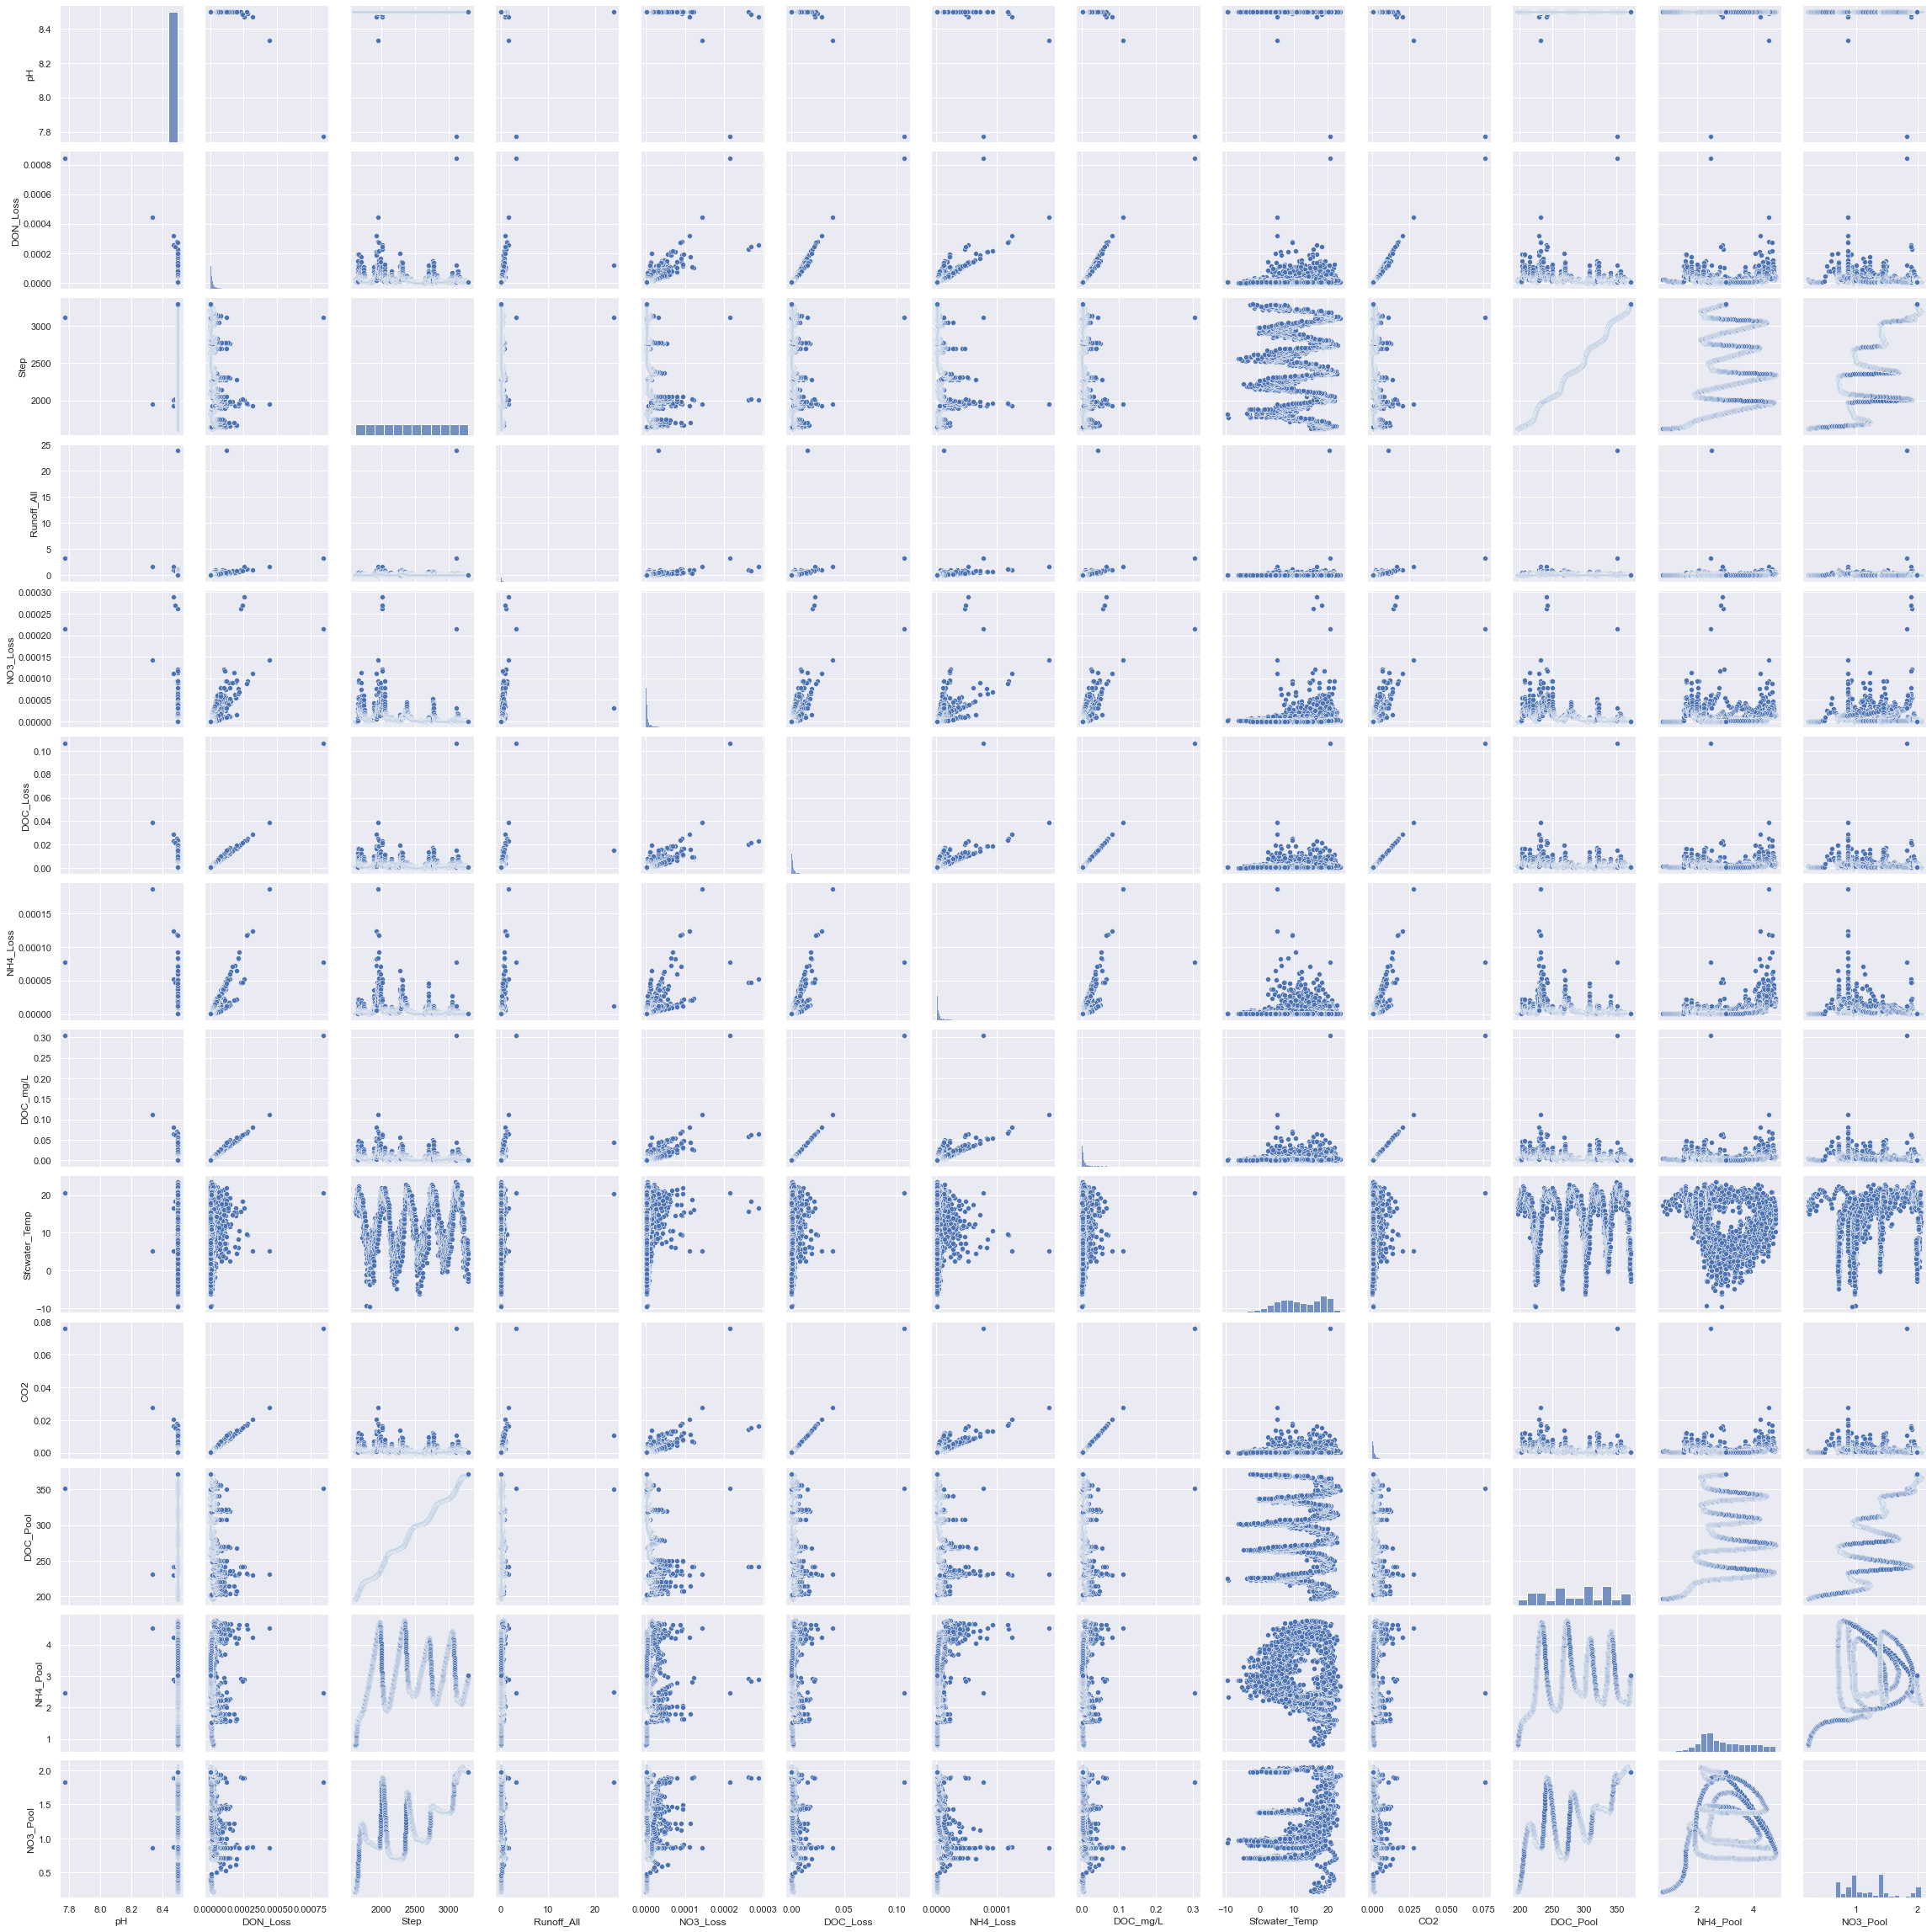

In [68]:
sns.pairplot(bc_pof.rename(columns={'pH_1T':'pH', 'NO3_Loss(gN/day/m2)_Delineated_Average':'NO3_Loss',
       'NH4_Loss(gN/day/m2)_Delineated_Average':'NH4_Loss',
       'DON_Loss(gN/day/m2)_Delineated_Average':'DON_Loss',
       'Runoff_All(mm/day)_Delineated_Average':'Runoff_All',
       'DOC_Loss(gC/day/m2)_Delineated_Average':'DOC_Loss',
       'Sfc_Water_Temp_C':'Sfcwater_Temp'}).drop(columns={'Year', 'Condition', 'Criteria', 'Unnamed: 0', 'Alk_140'}), dropna=True)

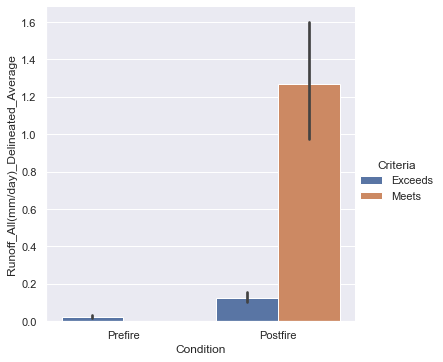

In [69]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Runoff_All(mm/day)_Delineated_Average',
            hue='Criteria')

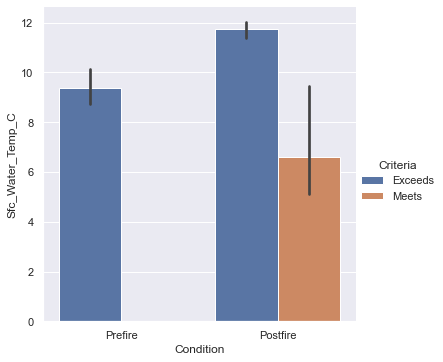

In [70]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='Sfc_Water_Temp_C',
            hue='Criteria')

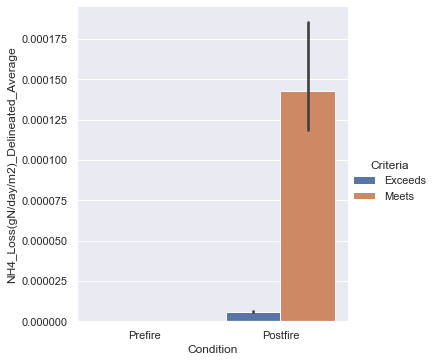

In [71]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

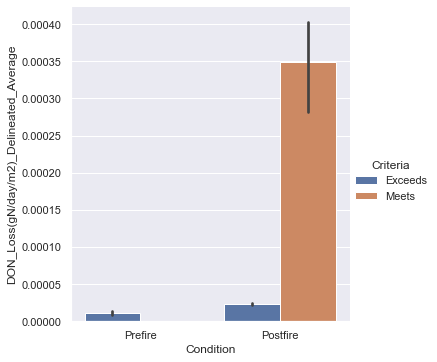

In [72]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DON_Loss(gN/day/m2)_Delineated_Average',
            hue='Criteria')

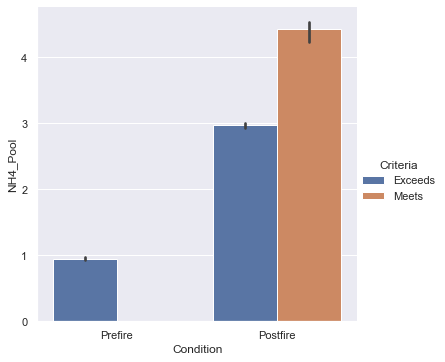

In [73]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NH4_Pool',
            hue='Criteria')

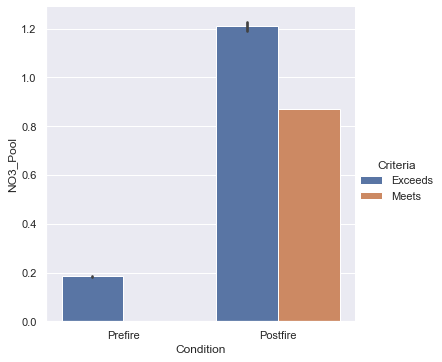

In [74]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='NO3_Pool',
            hue='Criteria')

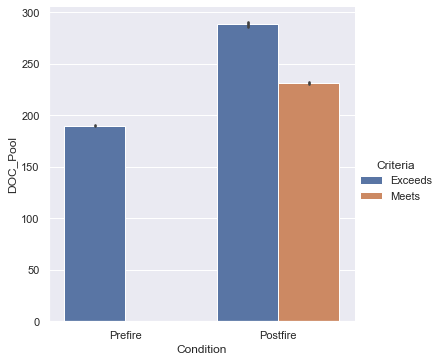

In [75]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Pool',
            hue='Criteria')

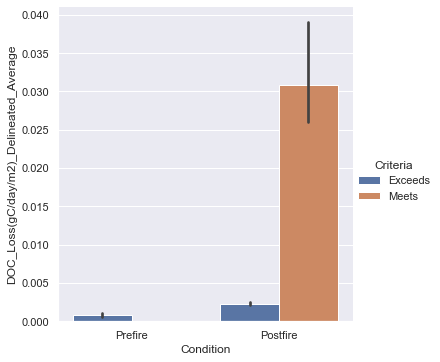

In [76]:
sns.catplot(data=df_di_a, kind='bar', x= 'Condition',
            y='DOC_Loss(gC/day/m2)_Delineated_Average',
            hue='Criteria')

In [77]:
df_di_a#.to_csv('111921_BC20APR21B_WQX_All_di.csv')

In [78]:
calc_pH(0.7, 22.9, 4.7, 50)

CO2 Estimate 15.909090909090908
Exponent value 5.853692464000001
H2CO3 value 1.400578760267948e-06
pkw= 1e-14
Alpha value= 2.2281934832444628e-05
SQRT of Alpha= 0.004720374437737395
A value 2.326023550138511
B value 0.43429448190325176
C value 0.00944074887547479



6.232002101795975

In [79]:
#data_df.loc[:,['new_ph_column']]=data_df.apply(lambda row: calc_pH(row['CO2_calc'],row['Sfcwater_Temp_C'],row['DOC_mg/L'], row['Alk_200']),axis=1)


In [80]:
#data_df.head()